# Mini Project Rendering

# 1.Analysis

## Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                             mean_squared_error, r2_score)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import (VotingClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

# Display full width in Jupyter notebooks
display(HTML("<style>.container { width:100% !important; }</style>"))
# Ignore warnings
warnings.filterwarnings("ignore")


## Data Import

In [2]:
# Replace the path with your actual path
path1 = "student-mat.csv"
path2 = "student-por.csv"

# Read the CSV files
df_student_mat = pd.read_csv(path1, sep=';')
df_student_por = pd.read_csv(path2, sep=';')


In [3]:
print(df_student_mat.info())
df_student_mat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print(df_student_por.info())
df_student_por.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


There are no missing values.

The first few rows show students mainly from the `GP` school, female, living in urban areas, with families of more than three members.
Parents’ education levels vary, and the students' final grades range from 11 to 14.

The additional columns, **`finalResult`** and **`academicGrade`**, indicate whether the student passed or failed and classify their grades into five categories (A to E).

## Data Cleaning

In [5]:
print(df_student_mat.shape)
print(df_student_por.shape)

(395, 33)
(649, 33)


In [6]:
print(df_student_mat.duplicated().sum())
print(df_student_por.duplicated().sum())

0
0


In [7]:
print(df_student_mat.isna().sum().sum()/df_student_mat.shape[0]*df_student_mat.shape[1]*100)
print(df_student_por.isna().sum().sum()/df_student_por.shape[0]*df_student_por.shape[1]*100)

0.0
0.0


Data is ready for analysis because it contains no duplicates or missing values.

## Data Viz

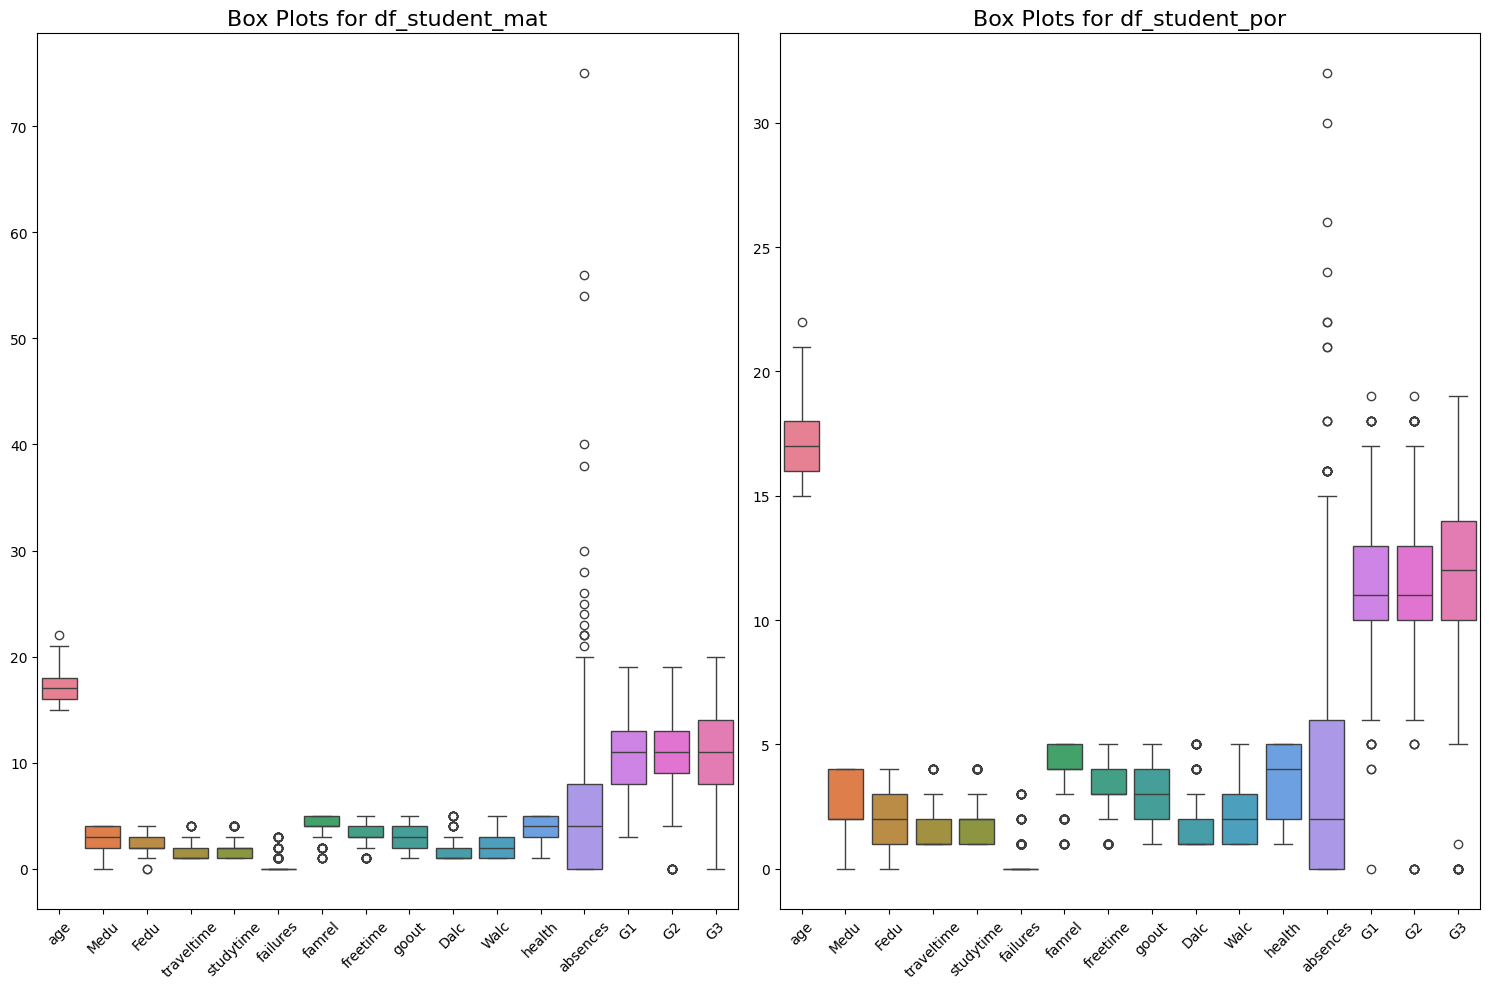

In [8]:
# Liste des colonnes numériques à afficher
numerical_columns = df_student_mat.select_dtypes(include=['int64']).columns

# Paramètres pour les graphiques
plt.figure(figsize=(15, 10))

# Boîtes à moustaches pour df_student_mat
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
sns.boxplot(data=df_student_mat[numerical_columns])
plt.title('Box Plots for df_student_mat', size=16)
plt.xticks(rotation=45)

# Boîtes à moustaches pour df_student_por
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2ème subplot
sns.boxplot(data=df_student_por[numerical_columns])
plt.title('Box Plots for df_student_por', size=16)
plt.xticks(rotation=45)

# Afficher les graphiques
plt.tight_layout()
plt.show()


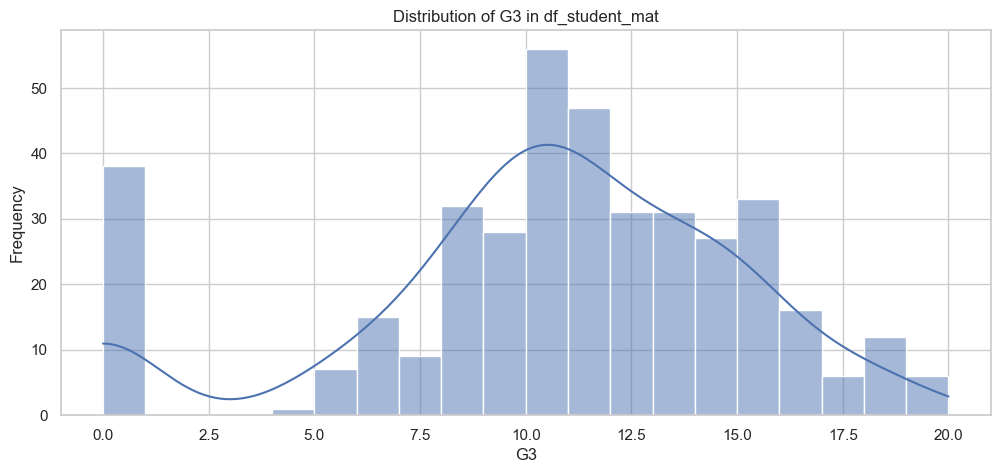

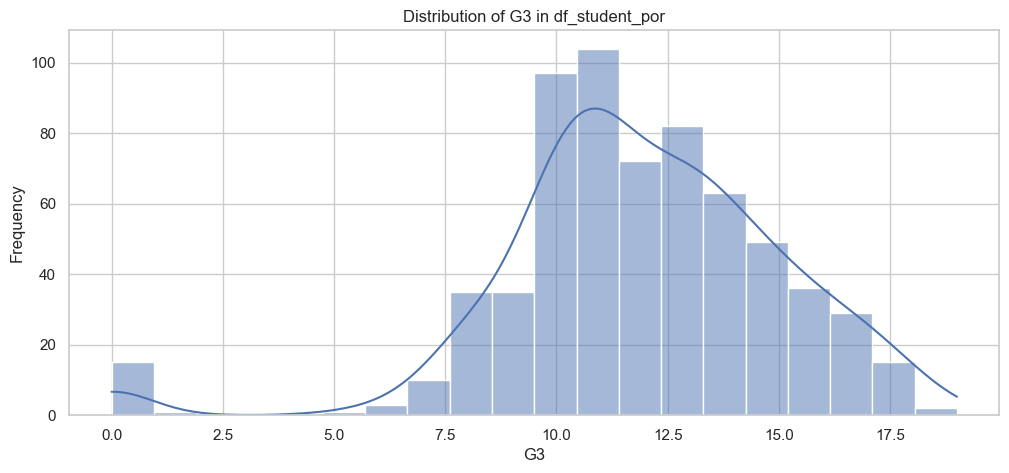

In [9]:
# Set visual style
sns.set(style="whitegrid")

# Plotting distribution of G3 for df_student_mat
plt.figure(figsize=(12, 5))
sns.histplot(df_student_mat['G3'], bins=20, kde=True)
plt.title('Distribution of G3 in df_student_mat')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of G3 for df_student_por
plt.figure(figsize=(12, 5))
sns.histplot(df_student_por['G3'], bins=20, kde=True)
plt.title('Distribution of G3 in df_student_por')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.show()


We can divide the first plot "Distribution of G3 in df_student_mat" into three categories:

- **Less than or equal to 10**: This represents the majority, indicating that many students struggle to understand and succeed in mathematics.
- **Between 10 and 15**: A moderate number of students fall into this range. They pass the subject but without standing out significantly.
- **Between 16 and 20**: Very few students reach this level of performance, showing that excellence in mathematics is rare within this group.

We can divide the second plot "Distribution of G3 in df_student_por" into three categories also:

- **Average less than or equal to 10**: Fewer students compared to mathematics.
- **Average between 10 and 15**: A large portion of students, indicating that many are performing at an average level.
- **Average between 16 and 20**: More students reach this level of performance compared to mathematics, showing that excellence is more common in Portuguese in this group.

## Dispersion Rate

In [10]:
def calculate_dispersion_rate(df):
    # Sélectionner les colonnes numériques
    numerical_columns = df.select_dtypes(include=['int64']).columns

    # Initialiser un dictionnaire pour stocker les résultats
    dispersion_rates = {}

    # Boucle sur chaque colonne numérique
    for col in numerical_columns:
        # Calculer les quartiles et l'IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Définir les bornes inférieure et supérieure
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifier les valeurs aberrantes
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Calculer le taux de dispersion
        total_count = df[col].count()  # Nombre total de valeurs
        outlier_count = outliers.shape[0]  # Nombre de valeurs aberrantes

        # Taux de dispersion en pourcentage
        dispersion_rate = (outlier_count / total_count) * 100 if total_count > 0 else 0

        # Stocker le résultat
        dispersion_rates[col] = dispersion_rate

    return dispersion_rates

# Calculer le taux de dispersion pour les deux DataFrames
dispersion_rate_mat = calculate_dispersion_rate(df_student_mat)
dispersion_rate_por = calculate_dispersion_rate(df_student_por)

# Afficher les résultats
print("Taux de dispersion des variables dans df_student_mat (en pourcentage):")
for variable, rate in dispersion_rate_mat.items():
    print(f"{variable}: {rate:.2f}%")

print("\nTaux de dispersion des variables dans df_student_por (en pourcentage):")
for variable, rate in dispersion_rate_por.items():
    print(f"{variable}: {rate:.2f}%")


Taux de dispersion des variables dans df_student_mat (en pourcentage):
age: 0.25%
Medu: 0.00%
Fedu: 0.51%
traveltime: 2.03%
studytime: 6.84%
failures: 21.01%
famrel: 6.58%
freetime: 4.81%
goout: 0.00%
Dalc: 4.56%
Walc: 0.00%
health: 0.00%
absences: 3.80%
G1: 0.00%
G2: 3.29%
G3: 0.00%

Taux de dispersion des variables dans df_student_por (en pourcentage):
age: 0.15%
Medu: 0.00%
Fedu: 0.00%
traveltime: 2.47%
studytime: 5.39%
failures: 15.41%
famrel: 7.86%
freetime: 6.93%
goout: 0.00%
Dalc: 5.24%
Walc: 0.00%
health: 0.00%
absences: 3.24%
G1: 2.47%
G2: 3.85%
G3: 2.47%


The dispersion rates for both df_student_mat and df_student_por are low, indicating that the variables are relatively homogeneous. Values considered as outliers are minimal, suggesting there is no need to address outliers in these datasets.






## General Data Protection Regulation (GDPR)

In [11]:
print(df_student_mat.columns)
print(df_student_por.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


When considering the General Data Protection Regulation (GDPR) and potential discriminatory issues, certain variables in your dataset may raise concerns. Here are the variables that could be problematic:
s:
- **sex**: Using sex as a variable could lead to discriminatory outcomes.
- **age**: Age could be used to discriminate against certain age groups.
- **address**: The type of address (urban or rural) could lead to discriminatory outcomes based on location.
- **famsize**: Family size could lead to discriminatory outcomes based on family structure.
- **Pstatus**: Parents' cohabitation status could lead to discriminatory outcomes based on family structure.
- **Medu and Fedu**: Parents' education levels could lead to discriminatory outcomes based on socio-economic status.
- **Mjob and Fjob**: Parents' jobs could lead to discriminatory outcomes based on socio-economic status.
- **romantic**: Information about romantic relationships could lead to discriminatory outcomes.
- **health**: Health status could lead to discriminatory outcomes based on health conditions.
nditions.

In [12]:
# Get the data types of each DataFrame
dtypes_mat = df_student_mat.dtypes
dtypes_por = df_student_por.dtypes

# Print the data types of each DataFrame
print("Data types for df_student_mat:\n", dtypes_mat)
print("\nData types for df_student_por:\n", dtypes_por)

# Compare the data types between the two DataFrames
# Align the two DataFrames on their columns to avoid errors
dtypes_comparison = pd.concat([dtypes_mat, dtypes_por], axis=1, keys=['df_student_mat', 'df_student_por'])

# Identify the columns with different data types
different_dtypes = dtypes_comparison[dtypes_comparison['df_student_mat'] != dtypes_comparison['df_student_por']]

# Print the columns with different data types
if not different_dtypes.empty:
    print("Columns with different data types:")
    print(different_dtypes)
else:
    print("All columns have the same data types.")


Data types for df_student_mat:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Data types for df_student_por:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        obje

## Descriptive statistics

In [13]:
df_student_mat.describe().round(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


In [14]:
df_student_por.describe().round(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


The two types of students, as described by the statistics, are similar in age, parental education, and study habits. Both groups have an average age of around 16.7 years, with similar distributions in parental education levels (Medu and Fedu). They spend comparable time studying and traveling, with slight variations in failures and family relationships. Both groups show similar patterns in free time, going out, and alcohol consumption (Dalc and Walc). Health and absences are also comparable. The main difference lies in the grades (G1, G2, G3), where the second group (student-por) has slightly higher average grades.

## Data Transforming

In [15]:
# Add the 'finalResult' column to df_student_mat
df_student_mat['finalResult'] = df_student_mat['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

# Add the 'finalResult' column to df_student_por
df_student_por['finalResult'] = df_student_por['G3'].apply(lambda x: 'pass' if x >= 10 else 'fail')

print(df_student_mat[['G3','finalResult']].head(2))
print(df_student_por[['G3','finalResult']].head(2))

   G3 finalResult
0   6        fail
1   6        fail
   G3 finalResult
0  11        pass
1  11        pass


Counts and Percentages in df_student_mat:
finalResult
pass    265
fail    130
Name: count, dtype: int64
finalResult
pass    67.09
fail    32.91
Name: count, dtype: float64

Counts and Percentages in df_student_por:
finalResult
pass    549
fail    100
Name: count, dtype: int64
finalResult
pass    84.59
fail    15.41
Name: count, dtype: float64


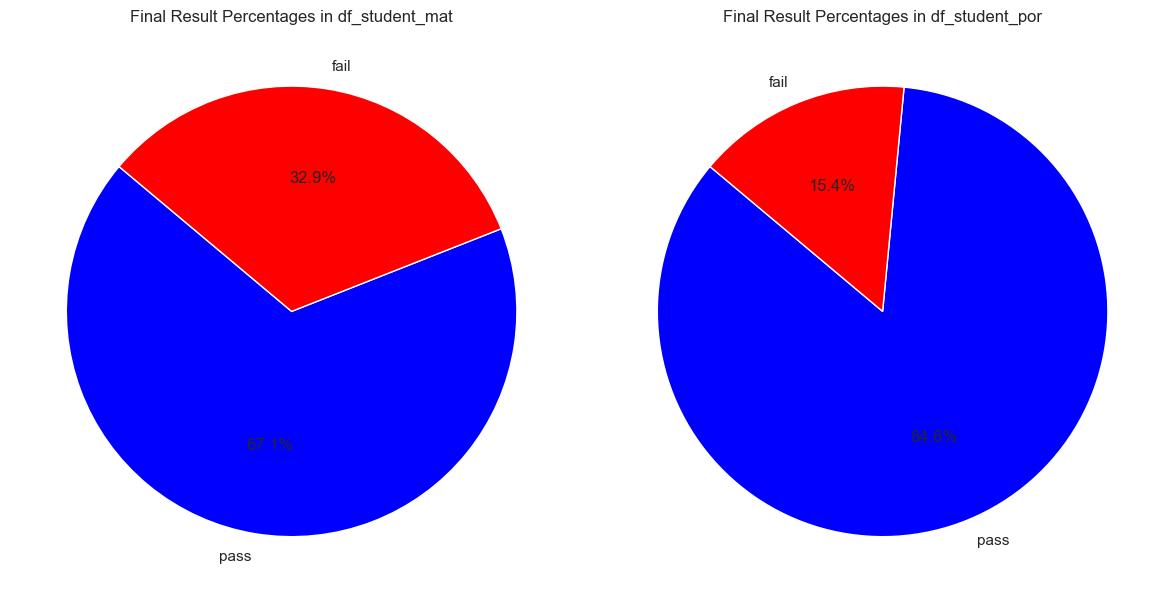

In [16]:
# Count the number of 'pass' and 'fail' in df_student_mat
count_mat = df_student_mat['finalResult'].value_counts()

# Count the number of 'pass' and 'fail' in df_student_por
count_por = df_student_por['finalResult'].value_counts()

# Calculate the percentages for df_student_mat
total_mat = count_mat.sum()
percentage_mat = (count_mat / total_mat) * 100

# Calculate the percentages for df_student_por
total_por = count_por.sum()
percentage_por = (count_por / total_por) * 100

# Print the counts and percentages
print("Counts and Percentages in df_student_mat:")
print(count_mat)
print(percentage_mat.round(2))

print("\nCounts and Percentages in df_student_por:")
print(count_por)
print(percentage_por.round(2))

# Visualize the results with pie charts
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for df_student_mat
ax[0].pie(percentage_mat, labels=percentage_mat.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
ax[0].set_title('Final Result Percentages in df_student_mat')

# Pie chart for df_student_por
ax[1].pie(percentage_por, labels=percentage_por.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
ax[1].set_title('Final Result Percentages in df_student_por')

plt.tight_layout()
plt.show()


There is a notable difference in the pass rates between the two datasets. The df_student_por dataset shows a significantly higher pass rate compared to the df_student_mat dataset. This suggests that students tend to perform better in Portuguese language (por) compared to Mathematics (mat).

In [17]:
# Function to determine the academic grade
def determine_grade(g3):
    if 16 <= g3 <= 20:
        return 'A'
    elif 14 <= g3 <= 15:
        return 'B'
    elif 12 <= g3 <= 13:
        return 'C'
    elif 10 <= g3 <= 11:
        return 'D'
    elif 0 <= g3 <= 9:
        return 'E'
    else:
        return 'Unknown'

# Add the 'academicGrade' column to df_student_mat
df_student_mat['academicGrade'] = df_student_mat['G3'].apply(determine_grade)

# Add the 'academicGrade' column to df_student_por
df_student_por['academicGrade'] = df_student_por['G3'].apply(determine_grade)


print(df_student_mat[['G3','academicGrade']].head(2))
print(df_student_por[['G3','academicGrade']].head(2))

   G3 academicGrade
0   6             E
1   6             E
   G3 academicGrade
0  11             D
1  11             D


Counts and Percentages in df_student_mat:
academicGrade
E    130
D    103
C     62
B     60
A     40
Name: count, dtype: int64
academicGrade
E    32.91
D    26.08
C    15.70
B    15.19
A    10.13
Name: count, dtype: float64

Counts and Percentages in df_student_por:
academicGrade
D    201
C    154
B    112
E    100
A     82
Name: count, dtype: int64
academicGrade
D    30.97
C    23.73
B    17.26
E    15.41
A    12.63
Name: count, dtype: float64


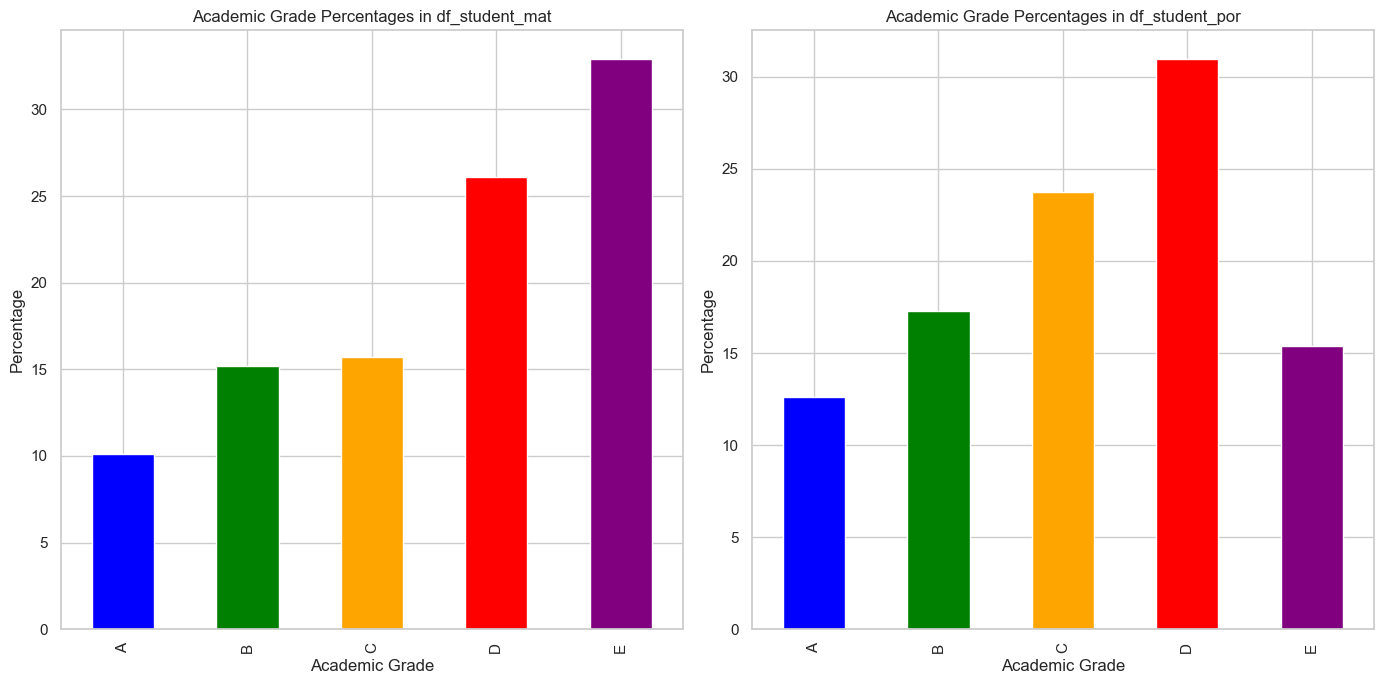

In [18]:
# Count the number of each academic grade in df_student_mat
count_mat = df_student_mat['academicGrade'].value_counts()

# Count the number of each academic grade in df_student_por
count_por = df_student_por['academicGrade'].value_counts()

# Calculate the percentages for df_student_mat
total_mat = count_mat.sum()
percentage_mat = (count_mat / total_mat) * 100

# Calculate the percentages for df_student_por
total_por = count_por.sum()
percentage_por = (count_por / total_por) * 100

# Print the counts and percentages
print("Counts and Percentages in df_student_mat:")
print(count_mat)
print(percentage_mat.round(2))

print("\nCounts and Percentages in df_student_por:")
print(count_por)
print(percentage_por.round(2))

# Ensure the grades are in the same order
grades = ['A', 'B', 'C', 'D', 'E']
percentage_mat = percentage_mat.reindex(grades)
percentage_por = percentage_por.reindex(grades)

# Visualize the results with bar charts
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Bar chart for df_student_mat
percentage_mat.plot(kind='bar', ax=ax[0], color=['blue', 'green', 'orange', 'red', 'purple'])
ax[0].set_title('Academic Grade Percentages in df_student_mat')
ax[0].set_xlabel('Academic Grade')
ax[0].set_ylabel('Percentage')

# Bar chart for df_student_por
percentage_por.plot(kind='bar', ax=ax[1], color=['blue', 'green', 'orange', 'red', 'purple'])
ax[1].set_title('Academic Grade Percentages in df_student_por')
ax[1].set_xlabel('Academic Grade')
ax[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

The analysis of academic grades reveals significant differences between Mathematics (mat) and Portuguese language (por) datasets. In the Mathematics dataset, the majority of students received grades "E" (32.91%) and "D" (26.08%), indicating lower performance. In contrast, the Portuguese language dataset shows a more even distribution, with the highest percentage of students receiving grade "D" (30.97%), followed by "C" (23.73%) and "B" (17.26%). This suggests better overall performance in Portuguese language compared to Mathematics.

## Exploratory analysis

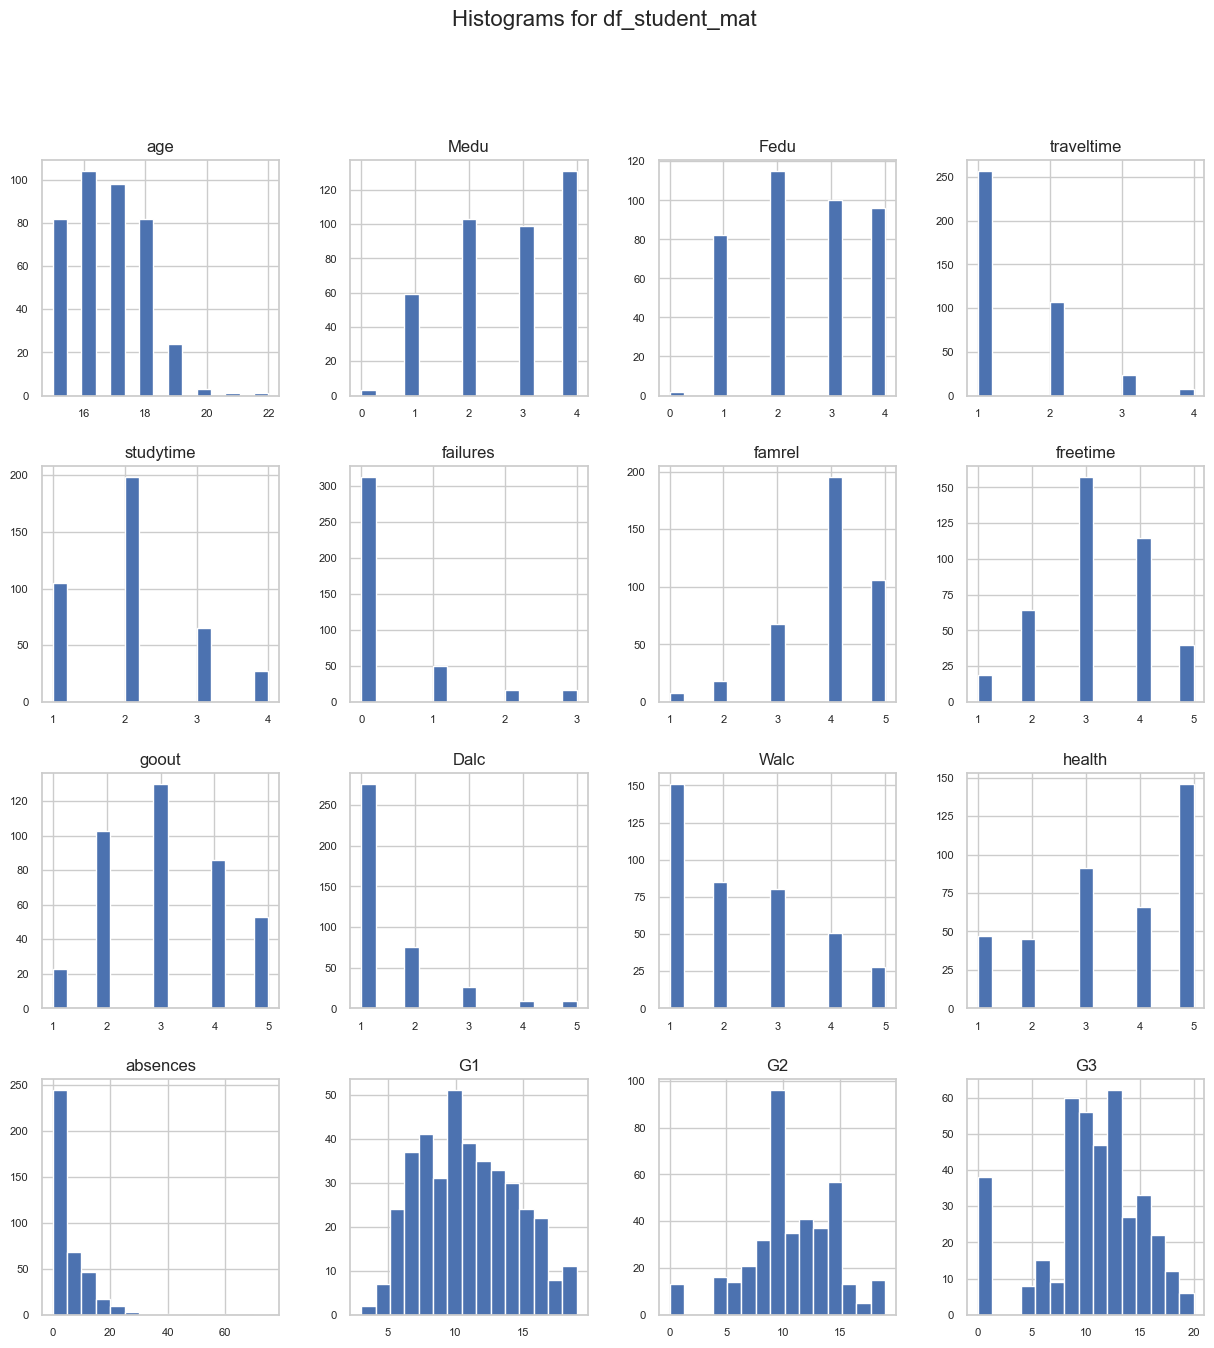

In [19]:
# Create histograms for df_student_mat
df_student_mat.hist(figsize=(15, 15), bins=15, xlabelsize=8, ylabelsize=8)
plt.suptitle('Histograms for df_student_mat', size=16)
plt.show()

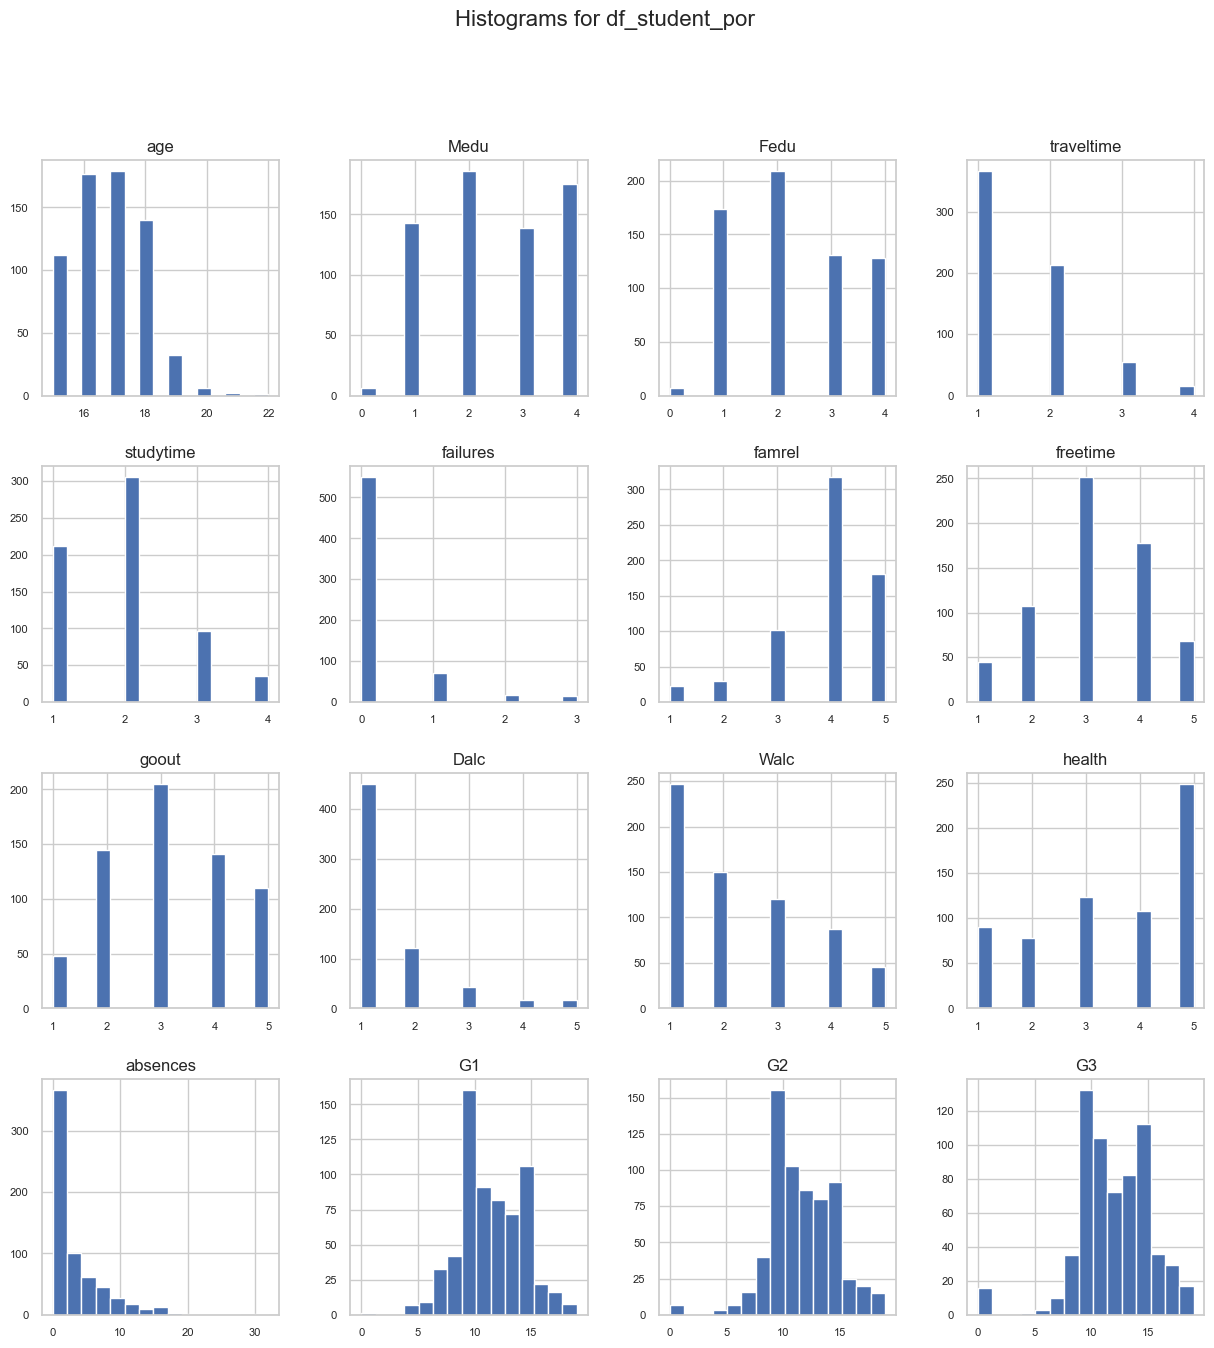

In [20]:
# Create histograms for df_student_por
df_student_por.hist(figsize=(15, 15), bins=15, xlabelsize=8, ylabelsize=8)
plt.suptitle('Histograms for df_student_por', size=16)
plt.show()


## Corrrelation

In [21]:
# Step 1: Extract numerical columns from both DataFrames
numerical_columns = df_student_mat.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Compute correlation matrices
correlation_mat = df_student_mat[numerical_columns].corr()
correlation_por = df_student_por[numerical_columns].corr()

# Step 3: Print the correlation matrices
print("Correlation matrix for df_student_mat:\n", correlation_mat)
print("\nCorrelation matrix for df_student_por:\n", correlation_por)


Correlation matrix for df_student_mat:
                  age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.01

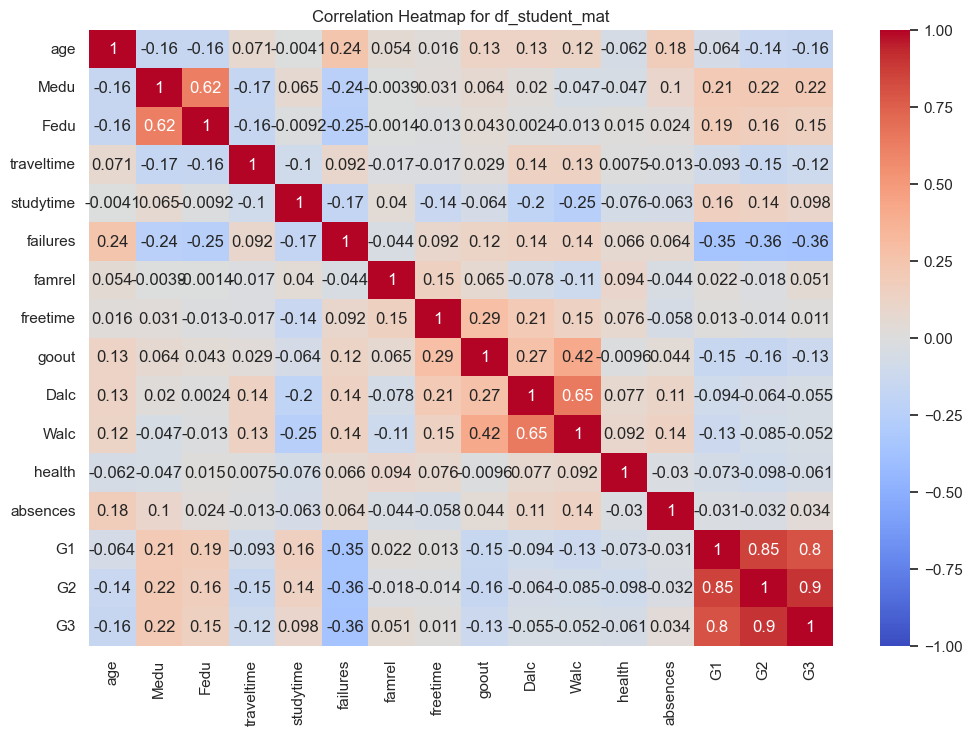

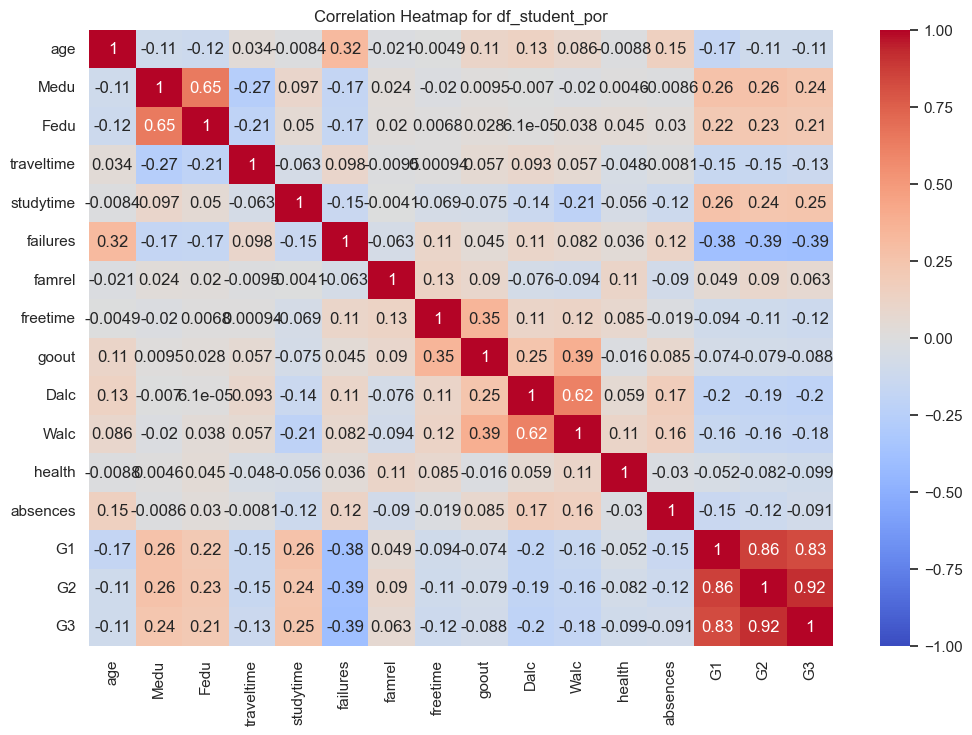

In [22]:
# Step 4: Visualize heatmaps using seaborn
plt.figure(figsize=(12, 8))
plt.title('Correlation Heatmap for df_student_mat')
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

plt.figure(figsize=(12, 8))
plt.title('Correlation Heatmap for df_student_por')
sns.heatmap(correlation_por, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


The most significant correlations in both datasets relate to student performance:

- **Grades (G1, G2, G3)**: These have very high positive correlations with each other (`G1-G2: 0.85`, `G2-G3: 0.91`), indicating that earlier grades strongly predict later grades.
- **Failures and Grades**: Strong negative correlations between failures and grades (`-0.36` to `-0.39`), showing that students with more failures tend to have lower grades.
- **Alcohol Consumption (Dalc, Walc)**: These are highly correlated (`0.65` to `0.62`), suggesting a consistent pattern in drinking during both weekdays and weekends.

These patterns highlight key factors influencing academic performance and behavior.


## Pearson correlation coefficient test

In [23]:
# Function to analyze the correlation with G3
def analyze_correlation_with_G3(data):
    # Convert all columns to numeric, forcing errors to NaN
    data_numeric = data.apply(pd.to_numeric, errors='coerce')

    # Initialize an empty list to store the results
    results = []

    # Loop through each variable in the DataFrame
    for column in data_numeric.columns:
        if column != "G3":  # Ignore the G3 column itself
            # Check if the column is numeric
            if data_numeric[column].dtype in ['int64', 'float64']:
                # Align the two series and drop NaN values
                g3_series = data_numeric["G3"].dropna()
                column_series = data_numeric[column].dropna()

                # Align indices
                aligned_data = pd.concat([g3_series, column_series], axis=1).dropna()

                if len(aligned_data) >= 2:  # Ensure there are enough values for correlation
                    # Calculate the Pearson correlation coefficient and the p-value
                    corr, p_value = pearsonr(aligned_data["G3"], aligned_data[column])
                    # Append the results to the list
                    results.append((column, corr, p_value))

    # Convert the list of results to a DataFrame
    results_df = pd.DataFrame(results, columns=["Variable", "Correlation Coefficient", "p-value"])

    # Sort the results by p-value
    results_df_sorted = results_df.sort_values(by="p-value")

    # Print the variables that have a significant correlation with G3 (p-value < 0.05)
    print("Variables with significant correlation with G3 (p-value < 0.05):")
    significant_results = results_df_sorted[results_df_sorted["p-value"] < 0.05]
    print(significant_results[["Variable", "Correlation Coefficient", "p-value"]])

    # Print the variables that do not have a significant correlation with G3 (p-value >= 0.05)
    print("\nVariables without significant correlation with G3 (p-value >= 0.05):")
    non_significant_results = results_df_sorted[results_df_sorted["p-value"] >= 0.05]
    print(non_significant_results[["Variable", "Correlation Coefficient", "p-value"]])

# Analyze the correlation for df_student_mat
print("Analysis for df_student_mat:")
analyze_correlation_with_G3(df_student_mat)

print("\nAnalysis for df_student_por:")
# Analyze the correlation for df_student_por
analyze_correlation_with_G3(df_student_por)


Analysis for df_student_mat:
Variables with significant correlation with G3 (p-value < 0.05):
      Variable  Correlation Coefficient        p-value
14          G2                 0.904868  7.625719e-148
13          G1                 0.801468   9.001430e-90
5     failures                -0.360415   1.465663e-13
1         Medu                 0.217147   1.336107e-05
0          age                -0.161579   1.271439e-03
2         Fedu                 0.152457   2.379973e-03
8        goout                -0.132791   8.229000e-03
3   traveltime                -0.117142   1.986983e-02

Variables without significant correlation with G3 (p-value >= 0.05):
     Variable  Correlation Coefficient   p-value
4   studytime                 0.097820  0.052061
11     health                -0.061335  0.223877
9        Dalc                -0.054660  0.278491
10       Walc                -0.051939  0.303152
6      famrel                 0.051363  0.308552
12   absences                 0.034247  0.49733

In the analysis of the **df_student_mat** dataset, the variables significantly correlated with G3 include:
- **G2** (correlation coefficient of 0.90)
- **G1** (0.80)
- **failures** (-0.36)
- **Medu** (0.22)
- **age** (-0.16)

For the **df_student_por** dataset, significant correlations with G3 were observed for:
- **G2** (0.92)
- **G1** (0.83)
- **failures** (-0.39)
- **studytime** (0.25)
- **Medu** (0.24)

These findings highlight the importance of prior grades and parental education in influencing students' final grades.


## ANOVA

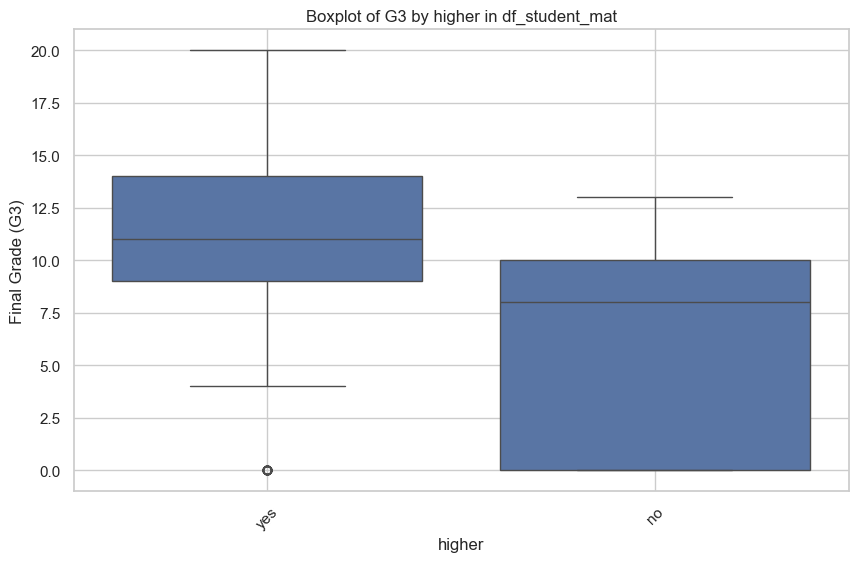

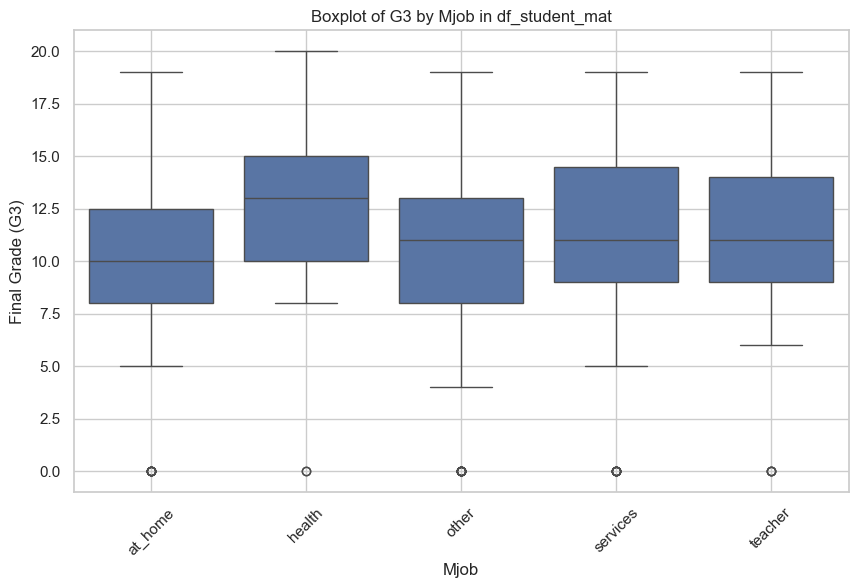

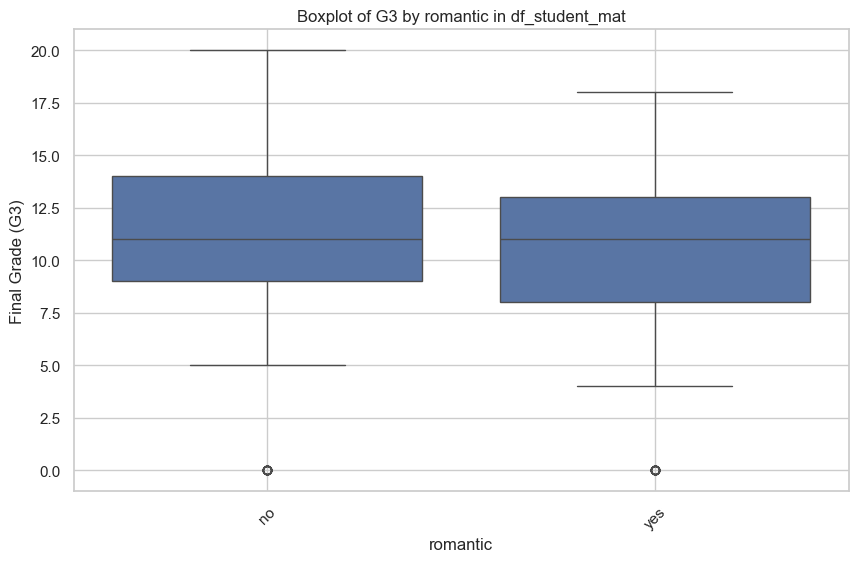

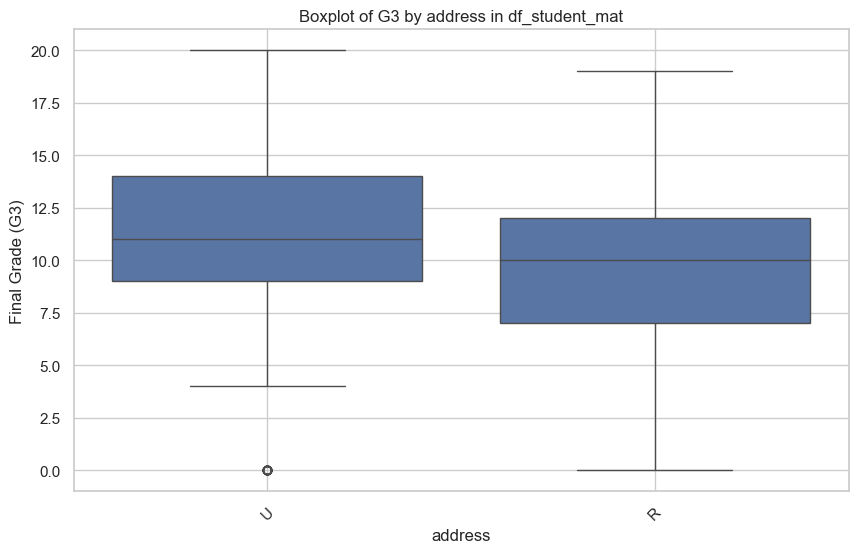

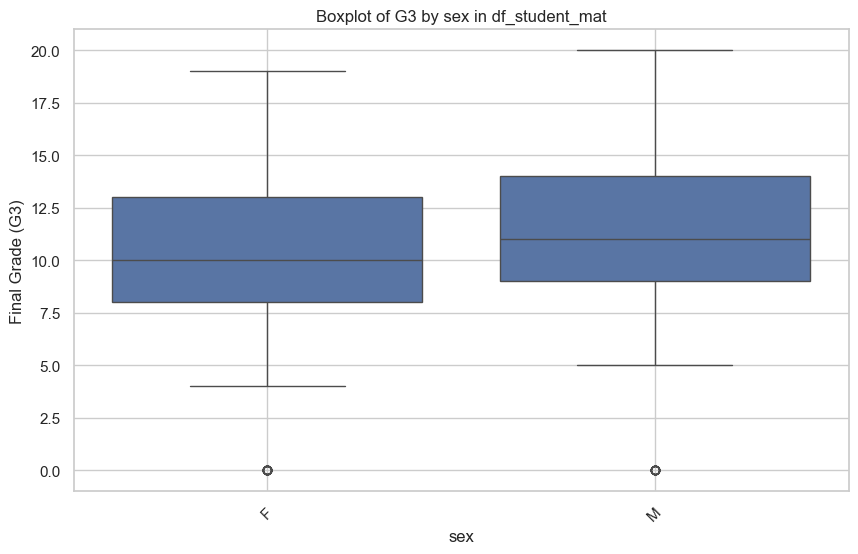

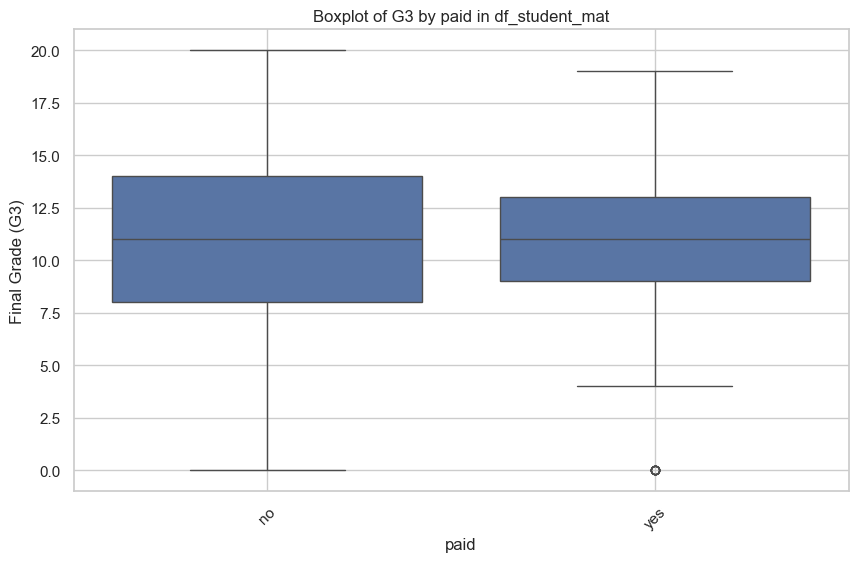

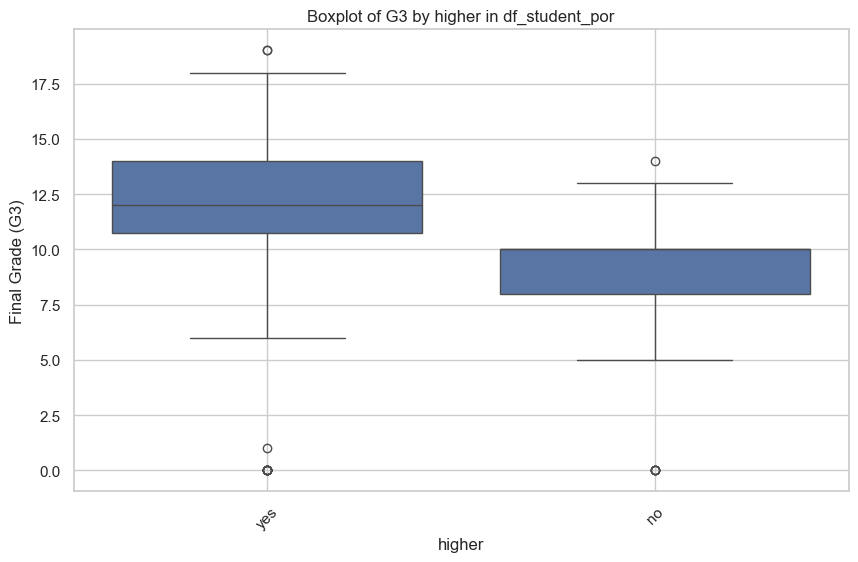

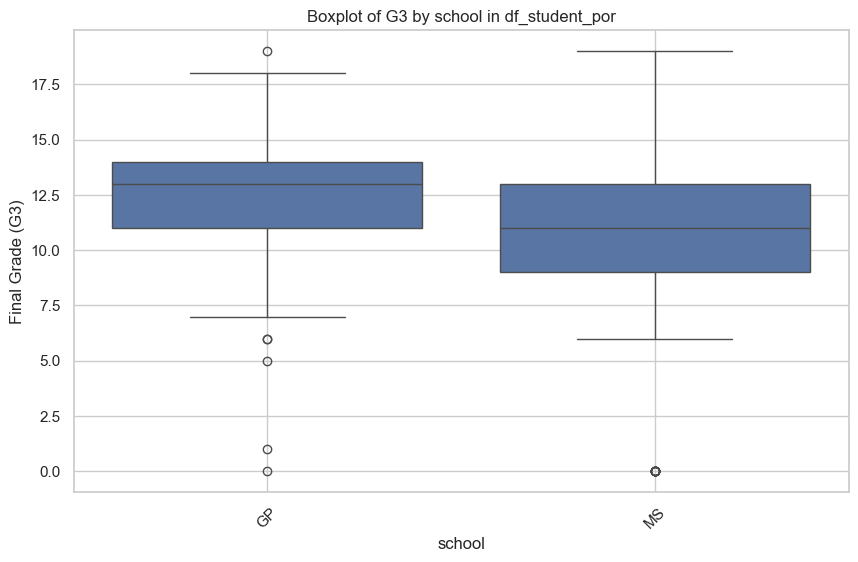

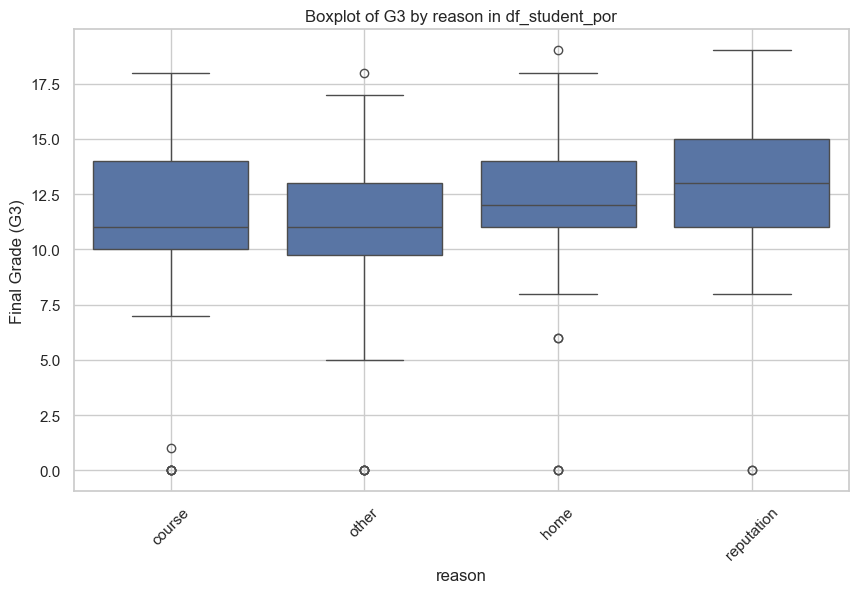

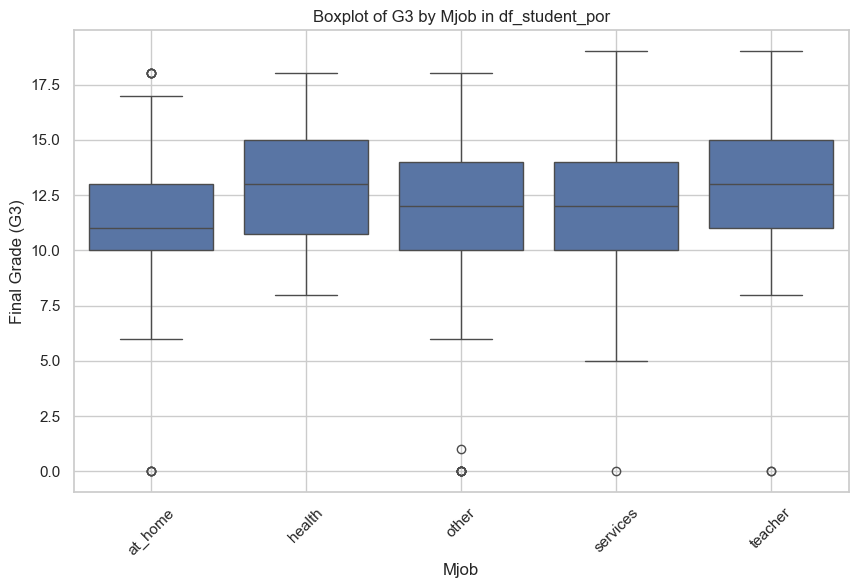

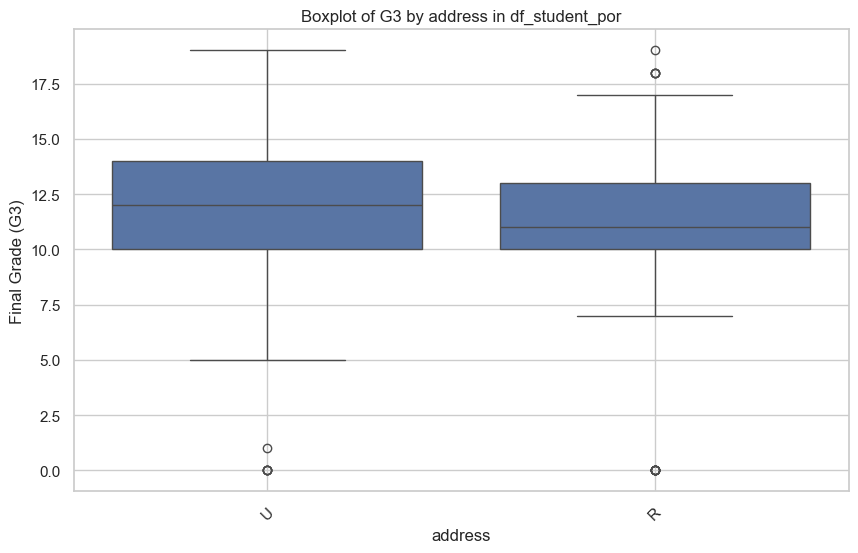

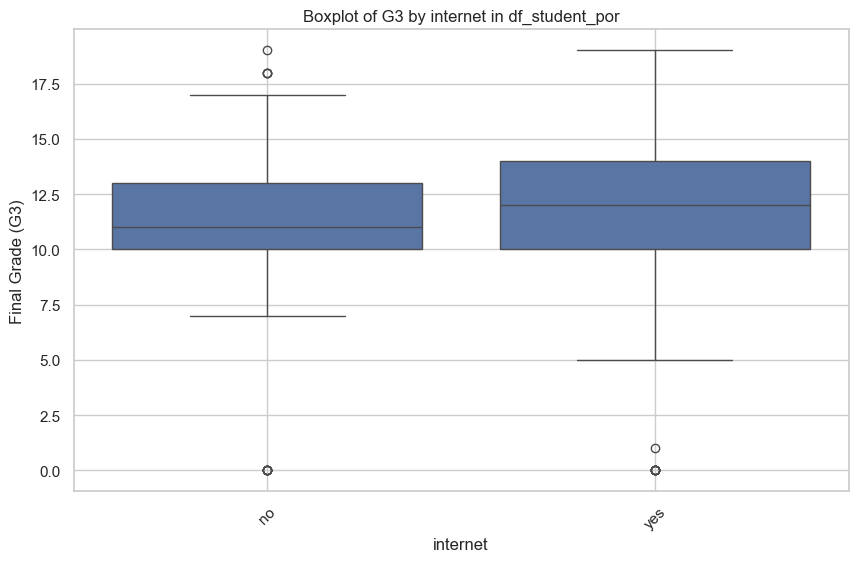

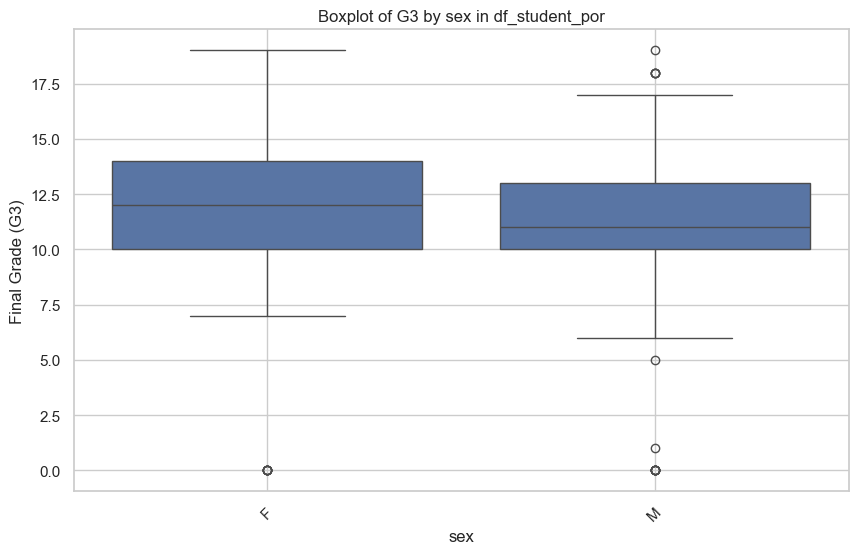

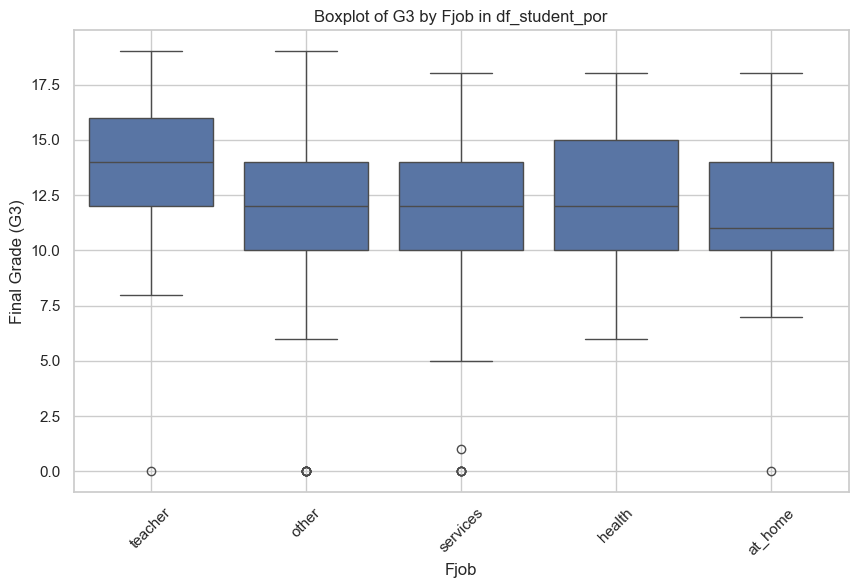

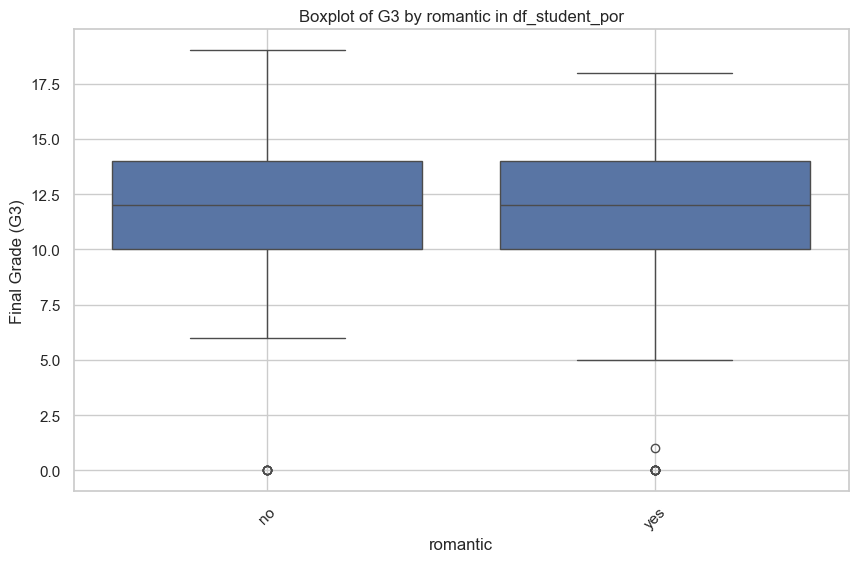

In [24]:
# List of significant qualitative variables to visualize for df_student_mat
qualitative_vars_mat = ['higher', 'Mjob', 'romantic', 'address', 'sex', 'paid']

# List of significant qualitative variables to visualize for df_student_por
qualitative_vars_por = ['higher', 'school', 'reason', 'Mjob', 'address', 'internet', 'sex', 'Fjob', 'romantic']

# Function to create boxplots
def create_boxplots(df, qualitative_vars, dataset_name):
    # Iterate over each qualitative variable
    for var in qualitative_vars:
        # Create a new figure for each boxplot
        plt.figure(figsize=(10, 6))
        # Use seaborn to create the boxplot
        sns.boxplot(x=var, y='G3', data=df)
        # Set the title of the plot
        plt.title(f'Boxplot of G3 by {var} in {dataset_name}')
        # Set the x-axis label
        plt.xlabel(var)
        # Set the y-axis label
        plt.ylabel('Final Grade (G3)')
        # Rotate the x-axis labels for better readability
        plt.xticks(rotation=45)
        # Add a grid to the plot
        plt.grid(True)
        # Display the plot
        plt.show()

# Create boxplots for df_student_mat
create_boxplots(df_student_mat, qualitative_vars_mat, 'df_student_mat')

# Create boxplots for df_student_por
create_boxplots(df_student_por, qualitative_vars_por, 'df_student_por')


In [25]:
# List of qualitative variables to test
qualitative_vars = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]

# Function to perform ANOVA
def perform_anova(df, qualitative_vars):
    results = {}

    for var in qualitative_vars:
        groups = [group['G3'].values for name, group in df.groupby(var)]  # Accessing the G3 column
        if len(groups) > 1:  # Checking if there are multiple groups
            f_stat, p_value = stats.f_oneway(*groups)
            results[var] = {'F-statistic': f_stat, 'p-value': p_value}

    return results

# Perform ANOVA on both DataFrames
anova_results_mat = perform_anova(df_student_mat, qualitative_vars)
anova_results_por = perform_anova(df_student_por, qualitative_vars)

# Function to sort and display significant results
def display_sorted_results(results, alpha=0.05):
    significant_results = {var: res for var, res in results.items() if res['p-value'] < alpha}
    sorted_results = sorted(significant_results.items(), key=lambda x: x[1]['p-value'])
    return sorted_results

# Display sorted results
sorted_mat = display_sorted_results(anova_results_mat)
sorted_por = display_sorted_results(anova_results_por)

print("Significant qualitative variables in df_student_mat (sorted by p-value):")
for var, res in sorted_mat:
    print(f"{var}: F-statistic = {res['F-statistic']:.4f}, p-value = {res['p-value']:.4f}")

print("\nSignificant qualitative variables in df_student_por (sorted by p-value):")
for var, res in sorted_por:
    print(f"{var}: F-statistic = {res['F-statistic']:.4f}, p-value = {res['p-value']:.4f}")


Significant qualitative variables in df_student_mat (sorted by p-value):
higher: F-statistic = 13.5349, p-value = 0.0003
Mjob: F-statistic = 3.7545, p-value = 0.0052
romantic: F-statistic = 6.7527, p-value = 0.0097
address: F-statistic = 4.4452, p-value = 0.0356
sex: F-statistic = 4.2518, p-value = 0.0399
paid: F-statistic = 4.1315, p-value = 0.0428

Significant qualitative variables in df_student_por (sorted by p-value):
higher: F-statistic = 80.2425, p-value = 0.0000
school: F-statistic = 56.8907, p-value = 0.0000
reason: F-statistic = 10.2485, p-value = 0.0000
Mjob: F-statistic = 7.3702, p-value = 0.0000
address: F-statistic = 18.7079, p-value = 0.0000
internet: F-statistic = 14.8976, p-value = 0.0001
sex: F-statistic = 10.9623, p-value = 0.0010
Fjob: F-statistic = 3.2727, p-value = 0.0114
romantic: F-statistic = 5.3527, p-value = 0.0210


To identify significant qualitative variables that could be useful for predicting student performance, we analyzed the results from two datasets: `df_student_mat` and `df_student_por`.

In `df_student_mat`, variables like **higher** (p-value = 0.0003) and **Mjob** (p-value = 0.0052) show strong correlations with the final grades (G3). Similarly, **romantic** relationships (p-value = 0.0097) and **address** (p-value = 0.0356) are also significant.

In `df_student_por`, the variable **higher** (p-value = 0.0000) stands out, alongside **school** (p-value = 0.0000) and **reason** (p-value = 0.0000). These findings highlight the importance of these qualitative factors in predicting academic success.


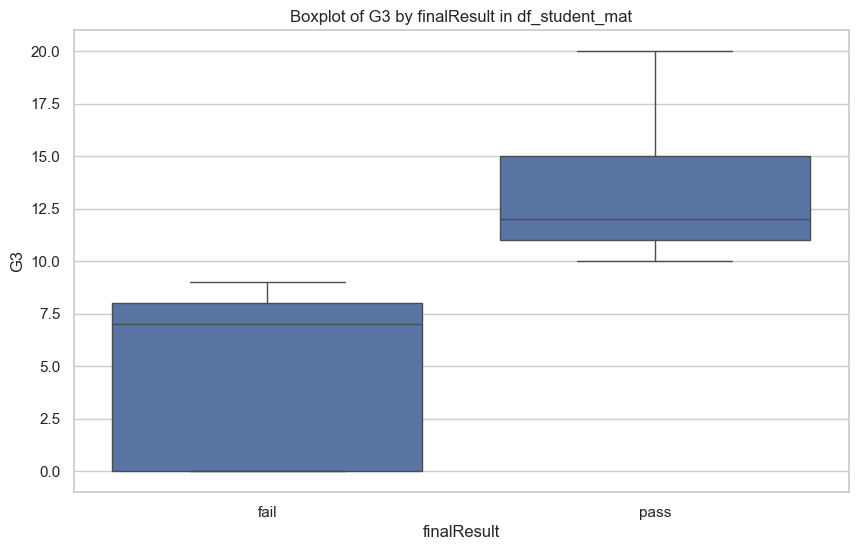

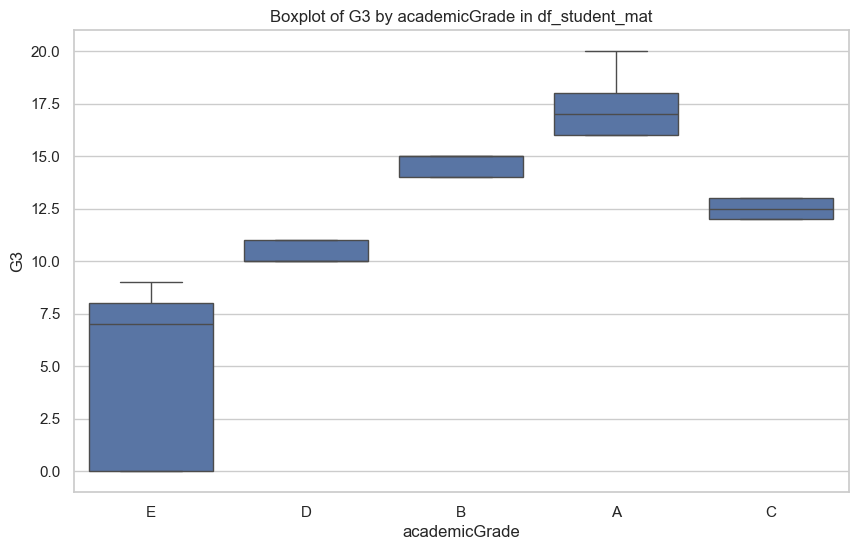

In [26]:
# Boxplot of G3 by finalResult in df_student_mat
plt.figure(figsize=(10, 6))
sns.boxplot(x='finalResult', y='G3', data=df_student_mat)
plt.title('Boxplot of G3 by finalResult in df_student_mat')
plt.show()

# Boxplot of G3 by academicGrade in df_student_mat
plt.figure(figsize=(10, 6))
sns.boxplot(x='academicGrade', y='G3', data=df_student_mat)
plt.title('Boxplot of G3 by academicGrade in df_student_mat')
plt.show()

In [27]:
# Group by finalResult and calculate statistics for G3 in df_student_mat
grouped_mat = df_student_mat.groupby('finalResult')['G3'].agg(['mean', 'median', 'std'])
print("Statistics for df_student_mat:")
print(grouped_mat)

# Group by academicGrade and calculate statistics for G3 in df_student_mat
grouped_mat = df_student_mat.groupby('academicGrade')['G3'].agg(['mean', 'median', 'std'])
print("\nStatistics for df_student_mat:")
print(grouped_mat)


Statistics for df_student_mat:
                  mean  median       std
finalResult                             
fail          5.384615     7.0  3.650177
pass         12.883019    12.0  2.498009

Statistics for df_student_mat:
                    mean  median       std
academicGrade                             
A              17.225000    17.0  1.187272
B              14.550000    15.0  0.501692
C              12.500000    12.5  0.504082
D              10.456311    10.0  0.500523
E               5.384615     7.0  3.650177


In df_student_mat, the mean "G3" score for students who failed is 5.38, while it is 12.88 for those who passed. This suggests that students who passed have, on average, higher "G3" scores than those who failed. When grouped by "academicGrade", students in grade A have the highest mean "G3" score (17.23), while students in grade E have the lowest (5.38).

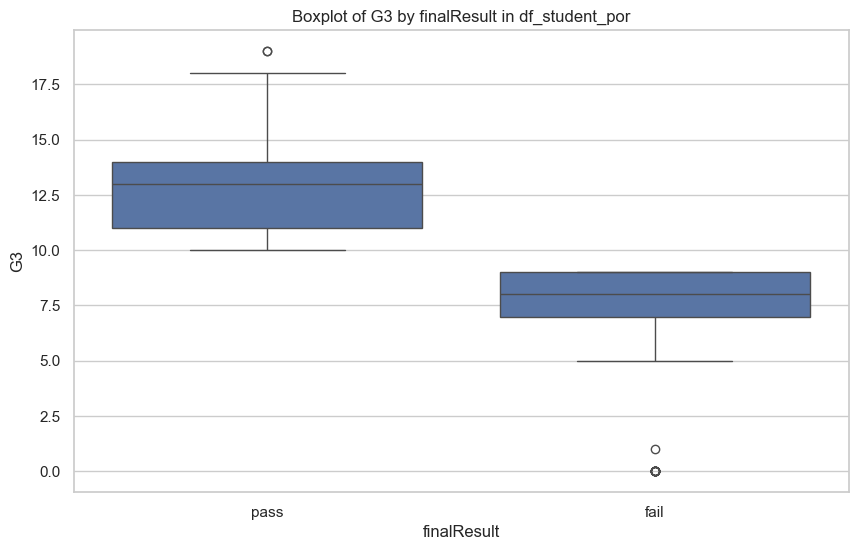

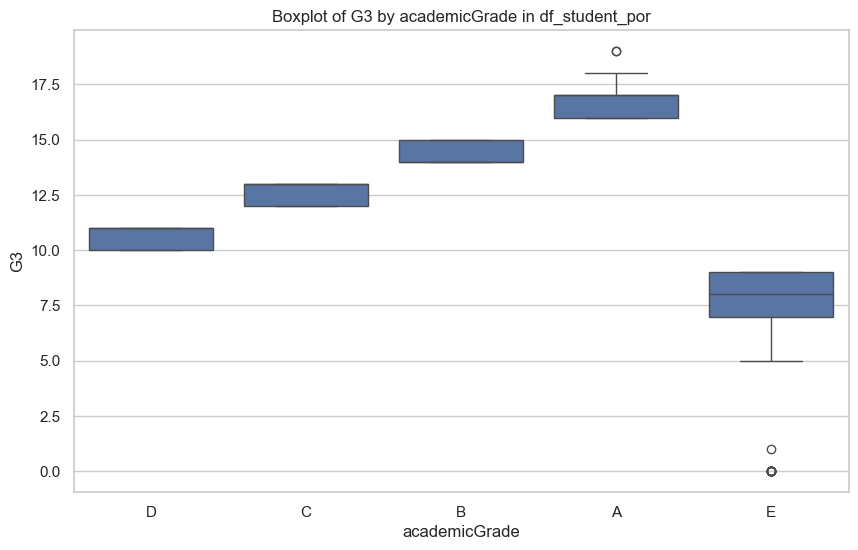

In [28]:
# Boxplot of G3 by finalResult in df_student_por
plt.figure(figsize=(10, 6))
sns.boxplot(x='finalResult', y='G3', data=df_student_por)
plt.title('Boxplot of G3 by finalResult in df_student_por')
plt.show()

# Boxplot of G3 by academicGrade in df_student_por
plt.figure(figsize=(10, 6))
sns.boxplot(x='academicGrade', y='G3', data=df_student_por)
plt.title('Boxplot of G3 by academicGrade in df_student_por')
plt.show()


In [29]:
# Group by finalResult and calculate statistics for G3 in df_student_por
grouped_por = df_student_por.groupby('finalResult')['G3'].agg(['mean', 'median', 'std'])
print("\nStatistics for df_student_por:")
print(grouped_por)

# Group by academicGrade and calculate statistics for G3 in df_student_por
grouped_por = df_student_por.groupby('academicGrade')['G3'].agg(['mean', 'median', 'std'])
print("\nStatistics for df_student_por:")
print(grouped_por)



Statistics for df_student_por:
                  mean  median       std
finalResult                             
fail          6.890000     8.0  3.100652
pass         12.819672    13.0  2.275363

Statistics for df_student_por:
                    mean  median       std
academicGrade                             
A              16.792683    17.0  0.827577
B              14.437500    14.0  0.498308
C              12.532468    13.0  0.500573
D              10.517413    11.0  0.500944
E               6.890000     8.0  3.100652


In df_student_por, the mean "G3" score for students who failed is 6.89, while it is 12.82 for those who passed. Similar to df_student_mat, students who passed have higher "G3" scores than those who failed. When grouped by "academicGrade", students in grade A have the highest mean "G3" score (16.79), while students in grade E have the lowest (6.89).

Overall, both dataframes show that students who passed have higher "G3" scores than those who failed, and students in higher grades tend to have higher "G3" scores. These findings suggest a **positive relationship** between "G3" scores, passing the course, and academic grade.

## Merge

In [30]:
# Concatenate the two dataframes vertically
df = pd.concat([df_student_mat, df_student_por], axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         1044 non-null   object
 1   sex            1044 non-null   object
 2   age            1044 non-null   int64 
 3   address        1044 non-null   object
 4   famsize        1044 non-null   object
 5   Pstatus        1044 non-null   object
 6   Medu           1044 non-null   int64 
 7   Fedu           1044 non-null   int64 
 8   Mjob           1044 non-null   object
 9   Fjob           1044 non-null   object
 10  reason         1044 non-null   object
 11  guardian       1044 non-null   object
 12  traveltime     1044 non-null   int64 
 13  studytime      1044 non-null   int64 
 14  failures       1044 non-null   int64 
 15  schoolsup      1044 non-null   object
 16  famsup         1044 non-null   object
 17  paid           1044 non-null   object
 18  activities     1044 non-null   obj

After analyzing the datasets, it was found that the datasets df_student_mat and df_student_por have similar structures and variables, which allows for their merging. By combining the data from both datasets, we can increase the sample size and potentially gain more insights into the relationships between variables

# 2.Binary classification

In [31]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         1044 non-null   object
 1   sex            1044 non-null   object
 2   age            1044 non-null   int64 
 3   address        1044 non-null   object
 4   famsize        1044 non-null   object
 5   Pstatus        1044 non-null   object
 6   Medu           1044 non-null   int64 
 7   Fedu           1044 non-null   int64 
 8   Mjob           1044 non-null   object
 9   Fjob           1044 non-null   object
 10  reason         1044 non-null   object
 11  guardian       1044 non-null   object
 12  traveltime     1044 non-null   int64 
 13  studytime      1044 non-null   int64 
 14  failures       1044 non-null   int64 
 15  schoolsup      1044 non-null   object
 16  famsup         1044 non-null   object
 17  paid           1044 non-null   object
 18  activities     1044 non-null   obj

### Data Preprocessing 

#### (One-Hot Encoding, Standardization)

In [32]:
# Step 1: Data Preprocessing

# Remove the last column from the original dataframe
data = data.iloc[:, :-1]

# 1.1. Handle categorical variables and convert them to numeric using OneHotEncoder
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('finalResult')  # Exclude target variable from encoding

# Using OneHotEncoder to convert categorical variables to dummy/indicator variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 1.3. Scaling the numerical features
numeric_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Standardize the numerical features
scaler = StandardScaler()
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

# 1.4. Encode target variable
# Encoding 'finalResult'
label_encoder = LabelEncoder()
data_encoded['finalResult'] = label_encoder.fit_transform(data_encoded['finalResult'])

# Step 2: Feature Selection
# We will create three datasets: one with all features, one without the last feature (G3),
# and one without the last two features (G2 and G3)

# Define features and target variable
X_full = data_encoded.drop(columns=['finalResult'])
y = data_encoded['finalResult']

# Dataset with all features except the last two
X_without_last_two = X_full.drop(columns=['G2', 'G3'])
# Dataset with all features except the last one
X_without_last_one = X_full.drop(columns=['G3'])

## k-NN classifier

In [33]:
# Step 3: k-NN Classification
def knn_classification(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the model
    knn = KNeighborsClassifier()

    # Define hyperparameter grid for k-NN
    param_grid = {'n_neighbors': range(1, 21)}  # Testing k from 1 to 20

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_knn = grid_search.best_estimator_

    # Predictions
    y_pred = best_knn.predict(X_test)

    # Metrics
    print("Best n_neighbors:", grid_search.best_params_['n_neighbors'])
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Perform k-NN classification on each feature set
print("Classification Results for All Features:")
knn_classification(X_full, y)

print("\nClassification Results for All Features Except Last One:")
knn_classification(X_without_last_one, y)

print("\nClassification Results for All Features Except Last Two:")
knn_classification(X_without_last_two, y)


Classification Results for All Features:
Best n_neighbors: 10
Confusion Matrix:
 [[ 31  29]
 [  6 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.52      0.64        60
           1       0.83      0.96      0.89       149

    accuracy                           0.83       209
   macro avg       0.83      0.74      0.77       209
weighted avg       0.83      0.83      0.82       209


Classification Results for All Features Except Last One:
Best n_neighbors: 8
Confusion Matrix:
 [[ 23  37]
 [  6 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.38      0.52        60
           1       0.79      0.96      0.87       149

    accuracy                           0.79       209
   macro avg       0.79      0.67      0.69       209
weighted avg       0.79      0.79      0.77       209


Classification Results for All Features Except Last Two:
Best n_neighbors

The classification models trained using different sets of predictors achieved accuracy scores of 0.83, 0.79, and 0.75 when using 32, 31, and 30 variables, respectively. The models performed better with more variables, but the decrease in performance when using only 30 variables suggests that some important predictors may have been excluded. The precision, recall, and F1-score metrics also varied across the models and classes, indicating that the models may have different strengths and weaknesses in classifying the two classes.

In [34]:
# Print the column names of each dataframe
print("Columns in Dataframe with all features:")
print(X_full.columns)

print("\nColumns in Dataframe with all features except the last one:")
print(X_without_last_one.columns)

print("\nColumns in Dataframe with all features except the last two:")
print(X_without_last_two.columns)

Columns in Dataframe with all features:
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

Columns in Dataframe with all features except the last one:
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mj

## Decision Tree

In [35]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         1044 non-null   object
 1   sex            1044 non-null   object
 2   age            1044 non-null   int64 
 3   address        1044 non-null   object
 4   famsize        1044 non-null   object
 5   Pstatus        1044 non-null   object
 6   Medu           1044 non-null   int64 
 7   Fedu           1044 non-null   int64 
 8   Mjob           1044 non-null   object
 9   Fjob           1044 non-null   object
 10  reason         1044 non-null   object
 11  guardian       1044 non-null   object
 12  traveltime     1044 non-null   int64 
 13  studytime      1044 non-null   int64 
 14  failures       1044 non-null   int64 
 15  schoolsup      1044 non-null   object
 16  famsup         1044 non-null   object
 17  paid           1044 non-null   object
 18  activities     1044 non-null   obj

Best parameters for 32 variables:  {'max_depth': 4, 'min_samples_split': 2}
Classification report for 32 variables:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.46      0.67      0.55        18
           9       0.00      0.00      0.00        20
          10       0.40      0.78      0.53        27
          11       0.53      0.68      0.60        25
          12       0.45      0.23      0.30        22
          13       0.59      0.62      0.60        21
          14       0.26      0.45      0.33        11
          15       0.58      0.55      0.56        20
          16       0.50      0.25      0.33        12
          17       0.00      0.00      0.00         5
          18       

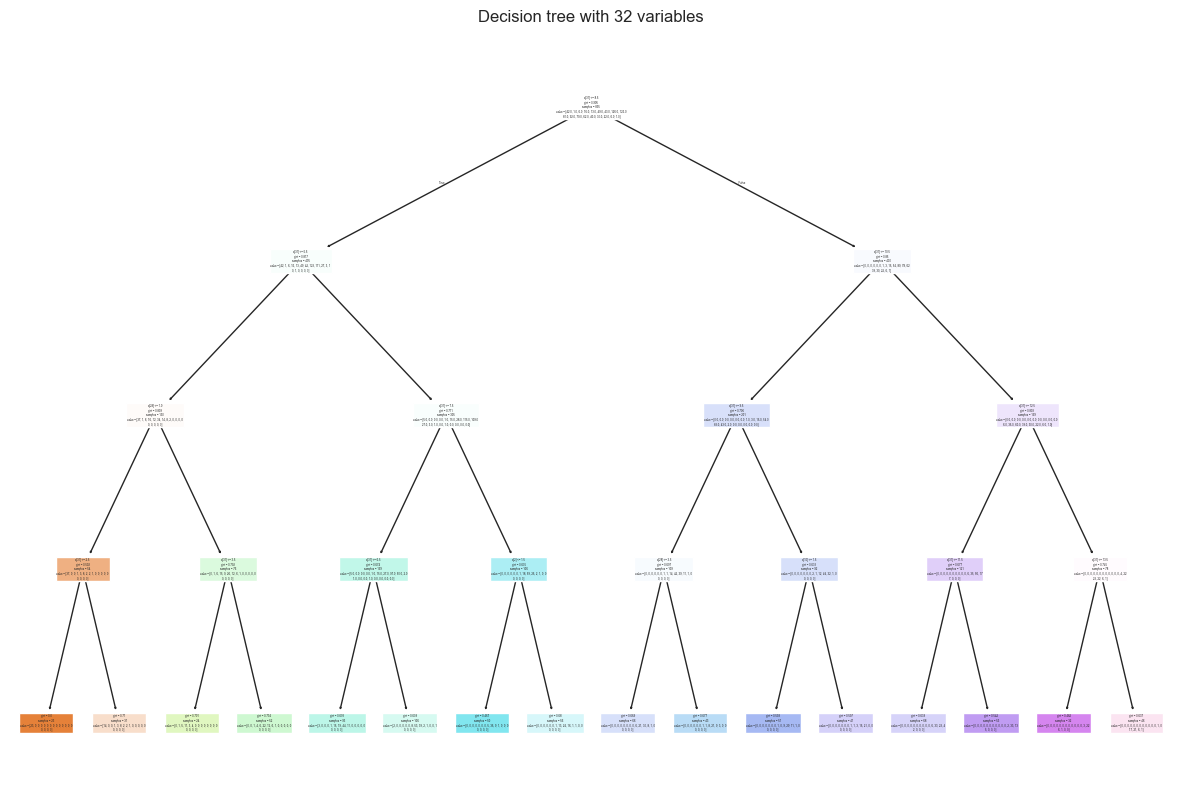

Best parameters for 31 variables:  {'max_depth': 3, 'min_samples_split': 2}
Classification report for 31 variables:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.41      0.72      0.52        18
           9       0.00      0.00      0.00        20
          10       0.29      0.26      0.27        27
          11       0.21      0.52      0.30        25
          12       0.00      0.00      0.00        22
          13       0.33      0.48      0.39        21
          14       0.00      0.00      0.00        11
          15       0.36      0.75      0.48        20
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00         5
          18       

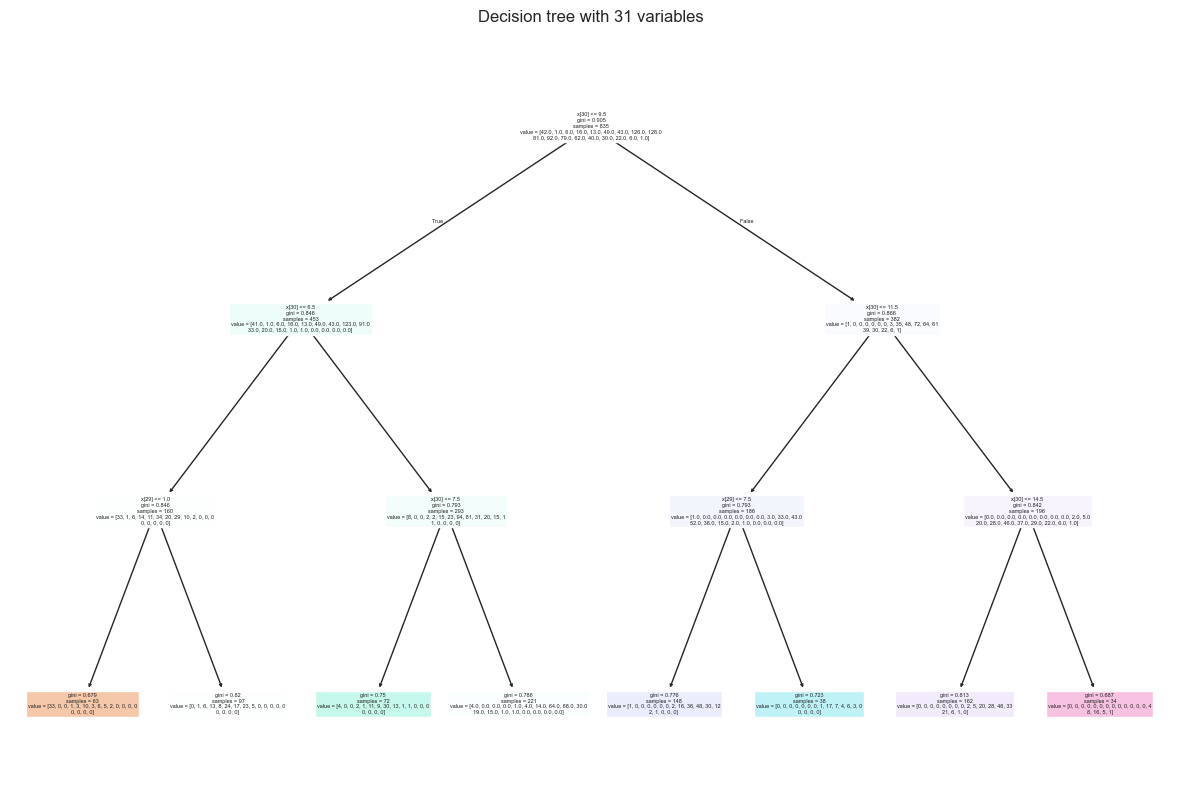

Best parameters for 30 variables:  {'max_depth': 4, 'min_samples_split': 3}
Classification report for 30 variables:
              precision    recall  f1-score   support

           0       0.29      0.36      0.32        11
           1       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.12      0.06      0.08        18
           9       0.33      0.05      0.09        20
          10       0.19      0.30      0.23        27
          11       0.21      0.32      0.25        25
          12       0.08      0.09      0.09        22
          13       0.06      0.24      0.10        21
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        20
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00         5
          18       

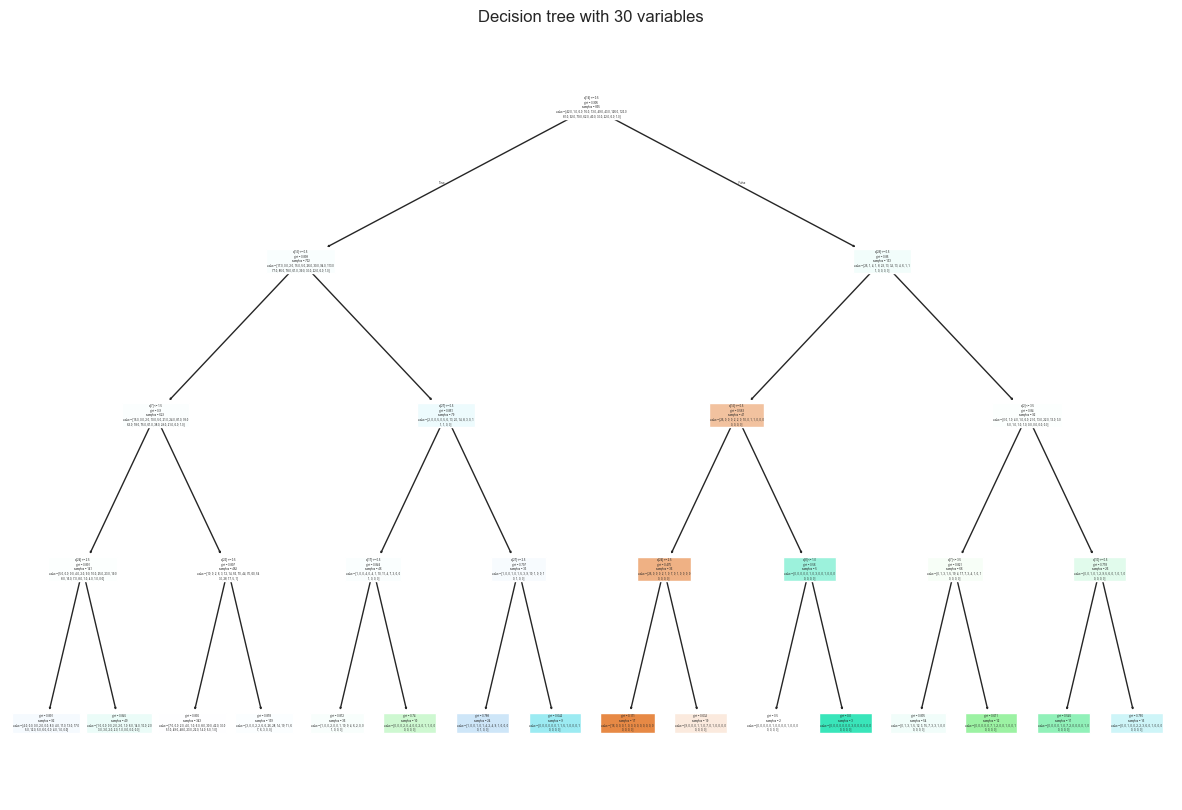

In [36]:
y = data['G3']  # The target variable

# Preprocess the data
le = LabelEncoder()
data = data.apply(le.fit_transform)

# Define the feature sets
X_32 = data.iloc[:, :32]  # Select the first 32 variables as predictors
X_31 = data.iloc[:, :31]  # Select the first 31 variables as predictors
X_30 = data.iloc[:, :30]  # Select the first 30 variables as predictors

# Define the grid of hyperparameters to search over
param_grid = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}

for i in range(32, 29, -1):
    X = data.iloc[:, :i]  # Select the first i variables as predictors

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the model
    model = DecisionTreeClassifier()

    # Perform the grid search
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print(f"Best parameters for {i} variables: ", grid_search.best_params_)

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Print the classification report
    print(f"Classification report for {i} variables:")
    print(classification_report(y_test, y_pred))

    # Print the confusion matrix
    print(f"Confusion matrix for {i} variables:")
    print(confusion_matrix(y_test, y_pred))

    # Display the decision tree
    plt.figure(figsize=(15, 10))
    plot_tree(grid_search.best_estimator_, filled=True)
    plt.title(f"Decision tree with {i} variables")
    plt.show()


The Decision Tree Classifier trained with different sets of predictors had varying performance, with accuracy ranging from 0.48 to 0.14. The model trained with the most variables (32) performed best, while the model trained with the fewest variables (30) performed worst. The models struggled to classify certain classes, particularly those with fewer samples.

In [37]:
# Print the column names of each feature set
print("Columns for 32 Features:")
print(X_32.columns)

print("\nColumns for 31 Features:")
print(X_31.columns)

print("\nColumns for 30 Features:")
print(X_30.columns)


Columns for 32 Features:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

Columns for 31 Features:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1'],
      dtype='object')

Columns for 30 Features:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 

## Voting Classifier

In [38]:

# Step 4: Voting Classifier
def voting_classifier(X, y, best_k, best_dt_params):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the individual classifiers
    knn = KNeighborsClassifier(n_neighbors=best_k)  # Use the best k found earlier
    dt = DecisionTreeClassifier(**best_dt_params, random_state=42)  # Decision Tree with best hyperparameters

    # Create the Voting Classifier (using 'hard' voting)
    voting_clf = VotingClassifier(estimators=[('knn', knn), ('dt', dt)], voting='hard')

    # Train the model
    voting_clf.fit(X_train, y_train)

    # Predictions
    y_pred = voting_clf.predict(X_test)

    # Metrics
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Perform Voting Classifier on each feature set with the corresponding best_k and best DT params
# Best Decision Tree parameters from GridSearch (replace these with actual results from question 5.3)
best_dt_params_32 = {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
best_dt_params_31 = {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
best_dt_params_30 = {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}

print("\nVoting Classifier Results for 32 Features:")
voting_classifier(X_32, y, best_k=8, best_dt_params=best_dt_params_32)  # Use best k and DT params for 32 features

print("\nVoting Classifier Results for 31 Features:")
voting_classifier(X_31, y, best_k=6, best_dt_params=best_dt_params_31)  # Use best k and DT params for 31 features

print("\nVoting Classifier Results for 30 Features:")
voting_classifier(X_30, y, best_k=6, best_dt_params=best_dt_params_30)  # Use best k and DT params for 30 features



Voting Classifier Results for 32 Features:
Confusion Matrix:
 [[ 7  0  0  0  0  1  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  2  3  0  8  2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  4  2 12  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  1  5 15  4  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 10 13  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5 10  4  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  9  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  3  3  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  3 11  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  6  2  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  2  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]]
Classification Rep

The Voting Classifier was trained using three sets of predictors: the first 32 variables, the first 31 variables, and the first 30 variables. The accuracy of the models ranged from 0.34 to 0.09, with the model trained using the first 32 variables performing the best and the model trained using the first 30 variables performing the worst. The models struggled to classify certain classes, particularly those with fewer samples.

In [39]:
# Print the column names of each feature set
print("Columns for 32 Features:")
print(X_32.columns)

print("\nColumns for 31 Features:")
print(X_31.columns)

print("\nColumns for 30 Features:")
print(X_30.columns)


Columns for 32 Features:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

Columns for 31 Features:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1'],
      dtype='object')

Columns for 30 Features:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 

## Comparison of Models

### (k-NN, Decision Tree, Voting Classifier)

The k-NN, Decision Tree, and Voting Classifier models were trained using three different sets of predictors: the first 32 variables, the first 31 variables, and the first 30 variables. The performance of the models was evaluated using metrics such as precision, recall, F1-score, and accuracy.

1. The k-NN model achieved the highest accuracy, with scores ranging from 0.83 to 0.75. The model trained using the first 32 variables performed the best, while the model trained using the first 30 variables performed the worst.
2. The Decision Tree model had the lowest accuracy, with scores ranging from 0.48 to 0.14. The model trained using the first 32 variables performed the best, while the model trained using the first 30 variables performed the worst.
3. The Voting Classifier model had an accuracy range of 0.34 to 0.09. The model trained using the first 32 variables performed the best, while the model trained using the first 30 variables performed the worst.

Overall, the k-NN model performed the best, followed by the Voting Classifier model, and then the Decision Tree model. The models struggled to classify certain classes, particularly those with fewer samples. The number of variables used for prediction also had an impact on the models' performance, with models trained using more variables performing better than those trained using fewer variables.
riables.


# 3. Multivariate classification

## Logistic regression

In [40]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df_student_mat and df_student_por are available with 'academicGrade' column created

# Step 1: Select relevant features based on correlation analysis
features_to_drop = ['G3', 'studytime', 'health', 'Dalc', 'Walc', 'famrel', 'absences', 'freetime']
X = df_student_mat.drop(columns=features_to_drop + ['academicGrade'])
y = df_student_mat['academicGrade']

# Step 2: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 3: Create ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Standardize numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # OneHotEncode categorical features
    ])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply the preprocessing to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 6: Initialize Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Step 7: Train the model
log_reg.fit(X_train_preprocessed, y_train)

# Step 8: Make predictions
y_pred = log_reg.predict(X_test_preprocessed)

# Step 9: Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 7  3  0  0  0]
 [ 1 10  5  0  0]
 [ 1  1  2  6  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]

Classification Report:
               precision    recall  f1-score   support

           A       0.78      0.70      0.74        10
           B       0.71      0.62      0.67        16
           C       0.29      0.20      0.24        10
           D       0.73      1.00      0.84        16
           E       1.00      1.00      1.00        27

    accuracy                           0.78        79
   macro avg       0.70      0.70      0.70        79
weighted avg       0.77      0.78      0.77        79


Accuracy: 0.7848101265822784


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Set up the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'none'],  # Regularization type
    'solver': ['lbfgs'],  # The solver lbfgs supports multinomial classification
    'multi_class': ['multinomial'],
    'max_iter': [1000]  # Ensuring sufficient iterations for convergence
}

# Step 2: Initialize Logistic Regression model
log_reg = LogisticRegression()

# Step 3: Use GridSearchCV to perform a brute force search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1)

# Step 4: Fit the model with the preprocessed training data
grid_search.fit(X_train_preprocessed, y_train)

# Step 5: Get the best model
best_log_reg = grid_search.best_estimator_

# Step 6: Make predictions on the test set
y_pred = best_log_reg.predict(X_test_preprocessed)

# Step 7: Evaluate the model
print("Best hyperparameters found:", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters found: {'C': 10, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

Confusion Matrix:
 [[ 6  4  0  0  0]
 [ 1 11  4  0  0]
 [ 1  1  2  6  0]
 [ 0  0  1 15  0]
 [ 0  0  0  0 27]]

Classification Report:
               precision    recall  f1-score   support

           A       0.75      0.60      0.67        10
           B       0.69      0.69      0.69        16
           C       0.29      0.20      0.24        10
           D       0.71      0.94      0.81        16
           E       1.00      1.00      1.00        27

    accuracy                           0.77        79
   macro avg       0.69      0.68      0.68        79
weighted avg       0.76      0.77      0.76        79


Accuracy: 0.7721518987341772


* Confusion Matrix:

The model performs well on class E (100% accuracy), correctly predicting all instances.

Class D also shows strong performance with 15 correct predictions out of 16.

Class C and Class A exhibit more errors, with lower precision and recall values, indicating difficulty in predicting these classes.
* Precision and F1-Score:

Class E has perfect precision, recall, and F1-score.

Class D has high scores, while Classes A and C have notably lower precision and recall, especially for Class C where the F1-score is only 0.24.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Confusion Matrix:
 [[ 8  2  0  0  0]
 [ 4  8  4  0  0]
 [ 0  1  6  3  0]
 [ 0  0  2 14  0]
 [ 0  0  0  0 27]]

Classification Report:
               precision    recall  f1-score   support

           A       0.67      0.80      0.73        10
           B       0.73      0.50      0.59        16
           C       0.50      0.60      0.55        10
           D       0.82      0.88      0.85        16
           E       1.00      1.00      1.00        27

    accuracy                           0.80        79
   macro avg       0.74      0.76      0.74        79
weighted avg       0.80      0.80      0.79        79


Accuracy: 0.7974683544303798


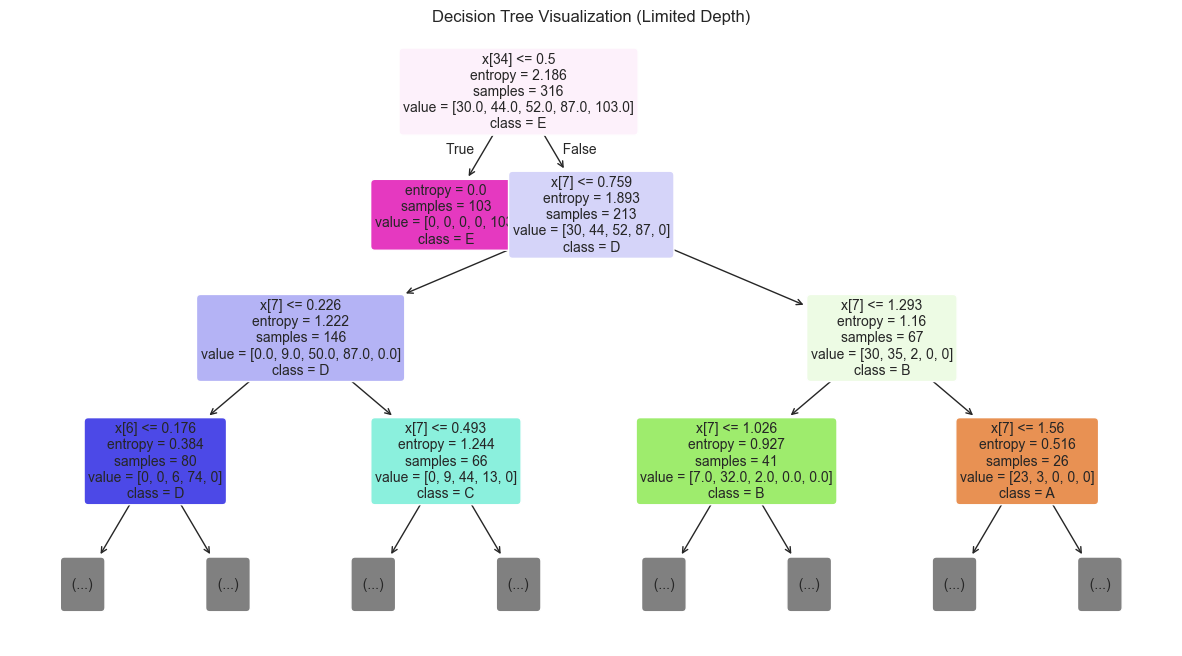

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Define the hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 5, 10, 20],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
}

# Step 2: Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Step 3: Use GridSearchCV to perform a brute force search
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, verbose=1, n_jobs=-1)

# Step 4: Fit the model with the preprocessed training data
grid_search.fit(X_train_preprocessed, y_train)

# Step 5: Get the best model
best_dt_model = grid_search.best_estimator_

# Step 6: Make predictions on the test set
y_pred = best_dt_model.predict(X_test_preprocessed)

# Step 7: Evaluate the model
print("Best hyperparameters found:", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Step 8: Visualize the Decision Tree with reduced complexity
plt.figure(figsize=(15, 8))  # Adjusted size for better fit
plot_tree(best_dt_model, 
          filled=True, 
          class_names=np.unique(y_train).astype(str), 
          rounded=True, 
          fontsize=10,
          max_depth=3)  # Limiting the depth of the tree displayed

plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()


In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize individual classifiers
logreg_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier()
dt_classifier = best_dt_model  # From the previous Decision Tree GridSearchCV

# Step 3: Define the Voting Classifier (Hard Voting)
voting_classifier = VotingClassifier(estimators=[
    ('logreg', logreg_classifier),
    ('knn', knn_classifier),
    ('decision_tree', dt_classifier)
], voting='hard')  # You can change this to 'soft' for probability-based voting

# Step 4: Train the Voting Classifier
voting_classifier.fit(X_train_preprocessed, y_train)

# Step 5: Make predictions
y_pred_voting = voting_classifier.predict(X_test_preprocessed)

# Step 6: Evaluate the model performance
print("\nConfusion Matrix (Voting Classifier):\n", confusion_matrix(y_test, y_pred_voting))
print("\nClassification Report (Voting Classifier):\n", classification_report(y_test, y_pred_voting))
print("\nAccuracy (Voting Classifier):", accuracy_score(y_test, y_pred_voting))



Confusion Matrix (Voting Classifier):
 [[ 8  2  0  0  0]
 [ 2 10  4  0  0]
 [ 0  3  2  5  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]

Classification Report (Voting Classifier):
               precision    recall  f1-score   support

           A       0.80      0.80      0.80        10
           B       0.67      0.62      0.65        16
           C       0.33      0.20      0.25        10
           D       0.76      1.00      0.86        16
           E       1.00      1.00      1.00        27

    accuracy                           0.80        79
   macro avg       0.71      0.72      0.71        79
weighted avg       0.77      0.80      0.78        79


Accuracy (Voting Classifier): 0.7974683544303798


In [44]:
# Assuming the best Decision Tree model from your previous GridSearchCV result
best_dt_model = grid_search.best_estimator_

# Train and evaluate Logistic Regression
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train_preprocessed, y_train)
y_pred_logreg = logreg_classifier.predict(X_test_preprocessed)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Train and evaluate k-NN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_preprocessed, y_train)
y_pred_knn = knn_classifier.predict(X_test_preprocessed)
print("\nK-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))

# Train and evaluate Decision Tree (best model from GridSearchCV)
best_dt_model.fit(X_train_preprocessed, y_train)
y_pred_dt = best_dt_model.predict(X_test_preprocessed)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Now let's implement and evaluate the Voting Classifier

# Step 1: Create a Voting Classifier with Logistic Regression, k-NN, and Decision Tree
voting_classifier = VotingClassifier(estimators=[
    ('logreg', logreg_classifier),
    ('knn', knn_classifier),
    ('decision_tree', best_dt_model)
], voting='hard')  # Use 'hard' voting (majority rule)

# Step 2: Train the Voting Classifier
voting_classifier.fit(X_train_preprocessed, y_train)

# Step 3: Make predictions using the Voting Classifier
y_pred_voting = voting_classifier.predict(X_test_preprocessed)

# Step 4: Evaluate the Voting Classifier
print("\nVoting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

# Optionally print the confusion matrix and classification report for more detailed analysis
print("\nConfusion Matrix (Voting Classifier):\n", confusion_matrix(y_test, y_pred_voting))
print("\nClassification Report (Voting Classifier):\n", classification_report(y_test, y_pred_voting))

# Final comparison of accuracies
print("\n--- Final Accuracy Comparison ---")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"k-NN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")



Logistic Regression Accuracy: 0.7848101265822784

K-Nearest Neighbors Accuracy: 0.6075949367088608

Decision Tree Accuracy: 0.7974683544303798

Voting Classifier Accuracy: 0.7974683544303798

Confusion Matrix (Voting Classifier):
 [[ 8  2  0  0  0]
 [ 2 10  4  0  0]
 [ 0  3  2  5  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]

Classification Report (Voting Classifier):
               precision    recall  f1-score   support

           A       0.80      0.80      0.80        10
           B       0.67      0.62      0.65        16
           C       0.33      0.20      0.25        10
           D       0.76      1.00      0.86        16
           E       1.00      1.00      1.00        27

    accuracy                           0.80        79
   macro avg       0.71      0.72      0.71        79
weighted avg       0.77      0.80      0.78        79


--- Final Accuracy Comparison ---
Logistic Regression Accuracy: 0.7848
k-NN Accuracy: 0.6076
Decision Tree Accuracy: 0.7975
Voting Classifier 

The results show that the Voting Classifier and the Decision Tree achieved the highest accuracy at 79.75%, slightly outperforming Logistic Regression with an accuracy of 78.48%. The k-Nearest Neighbors (k-NN) classifier performed the worst, with an accuracy of only 60.76%. The Voting Classifier, which combines Logistic Regression, k-NN, and Decision Tree using hard voting, leveraged the strengths of multiple models to achieve strong performance. The classification report reveals that precision, recall, and F1-scores are generally high for most classes, particularly for class "E," which achieved perfect scores. This demonstrates the effectiveness of the ensemble method.

The Decision Tree and Voting Classifier perform better because Decision Trees effectively capture complex, non-linear relationships in the data. The Voting Classifier further improves accuracy by combining the strengths of multiple models (Logistic Regression, k-NN, and Decision Tree), leading to more robust predictions through ensemble learning.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   school         1044 non-null   int64
 1   sex            1044 non-null   int64
 2   age            1044 non-null   int64
 3   address        1044 non-null   int64
 4   famsize        1044 non-null   int64
 5   Pstatus        1044 non-null   int64
 6   Medu           1044 non-null   int64
 7   Fedu           1044 non-null   int64
 8   Mjob           1044 non-null   int64
 9   Fjob           1044 non-null   int64
 10  reason         1044 non-null   int64
 11  guardian       1044 non-null   int64
 12  traveltime     1044 non-null   int64
 13  studytime      1044 non-null   int64
 14  failures       1044 non-null   int64
 15  schoolsup      1044 non-null   int64
 16  famsup         1044 non-null   int64
 17  paid           1044 non-null   int64
 18  activities     1044 non-null   int64
 19  nursery     

In [46]:
3

3

In [47]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   school         1044 non-null   object
 1   sex            1044 non-null   object
 2   age            1044 non-null   int64 
 3   address        1044 non-null   object
 4   famsize        1044 non-null   object
 5   Pstatus        1044 non-null   object
 6   Medu           1044 non-null   int64 
 7   Fedu           1044 non-null   int64 
 8   Mjob           1044 non-null   object
 9   Fjob           1044 non-null   object
 10  reason         1044 non-null   object
 11  guardian       1044 non-null   object
 12  traveltime     1044 non-null   int64 
 13  studytime      1044 non-null   int64 
 14  failures       1044 non-null   int64 
 15  schoolsup      1044 non-null   object
 16  famsup         1044 non-null   object
 17  paid           1044 non-null   object
 18  activities     1044 non-null   obj

# 4. Regression

In [48]:
# Assuming df is your original DataFrame
data = df.copy()  # Copy the DataFrame

# Drop the last two columns
data = data.drop(data.columns[-2:], axis=1)

# Check the DataFrame structure
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

### Data Preprocessing

#### (Transformation Pipeline)

In [49]:
# Dropping G1, G2 since they are highly correlated with G3
X = data.drop(columns=['G3'])
y = data['G3']  # Target variable

# List of categorical and numerical columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
                     'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # One-hot encode categorical features
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the train data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = preprocessor.transform(X_test)

# Now X_train_preprocessed and X_test_preprocessed are ready for modeling


In [50]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the preprocessed training data
model.fit(X_train_preprocessed, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_preprocessed)

# Calculate the Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')


Mean Squared Error: 3.20
R-squared Score: 0.79


The model evaluation metrics indicate a Mean Squared Error (MSE) of 3.20, suggesting that the average squared difference between predicted and actual values is relatively low. The R-squared score of 0.79 implies that the model explains approximately 79% of the variance in the target variable, demonstrating good predictive capability.

### Best hyperparameters (Random Forest model)

In [61]:
# Assuming 'data' is your DataFrame and the target variable 'G3' has already been separated
X = data.drop(columns=['G3'])
y = data['G3']  # Target variable

# List of categorical and numerical columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
                     'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # One-hot encode categorical features
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that combines the preprocessor and the model
model = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Define hyperparameter grid with correct prefixes
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of trees
    'model__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert back to positive since we used neg_mean_squared_error

print("Best Parameters:", best_params)
print("Best Cross-Validation Score (MSE):", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)

print("Test Set Score (R²):", test_score)


Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Best Cross-Validation Score (MSE): 2.026896167540511
Test Set Score (R²): 0.8205413281617142


### Linear, k-NNe, Decision Tree, regressor

In [52]:
# Assuming 'data' is your DataFrame and the target variable 'G3' has already been separated
X = data.drop(columns=['G3'])
y = data['G3']  # Target variable

# List of categorical and numerical columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',
                     'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # One-hot encode categorical features
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Linear Regression with Hyperparameter Tuning ###

# Create a pipeline that combines the preprocessor and the Linear Regression model
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

# Fit the model
linear_pipeline.fit(X_train, y_train)

# Predict and compute MSE
linear_predictions = linear_pipeline.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)

print("Linear Regression MSE:", linear_mse)

### 2. k-NN Regressor with Hyperparameter Tuning ###

# Create a pipeline that combines the preprocessor and the k-NN model
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', KNeighborsRegressor())])

# Define hyperparameter grid for k-NN
knn_param_grid = {
    'model__n_neighbors': [3, 5, 7, 10],  # Number of neighbors
    'model__weights': ['uniform', 'distance'],  # Weighting function
}

# Set up GridSearchCV
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
knn_grid_search.fit(X_train, y_train)

# Best parameters and score
knn_best_params = knn_grid_search.best_params_
knn_best_score = -knn_grid_search.best_score_  # Convert back to positive since we used neg_mean_squared_error
print("k-NN Best Parameters:", knn_best_params)
print("k-NN Best Cross-Validation Score (MSE):", knn_best_score)

# Evaluate the best k-NN model on the test set
knn_best_model = knn_grid_search.best_estimator_
knn_test_predictions = knn_best_model.predict(X_test)
knn_test_mse = mean_squared_error(y_test, knn_test_predictions)

print("k-NN Test Set MSE:", knn_test_mse)

### 3. Decision Tree Regressor with Hyperparameter Tuning ###

# Create a pipeline that combines the preprocessor and the Decision Tree model
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state=42))])

# Define hyperparameter grid for Decision Tree
dt_param_grid = {
    'model__max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}

# Set up GridSearchCV
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
dt_grid_search.fit(X_train, y_train)

# Best parameters and score
dt_best_params = dt_grid_search.best_params_
dt_best_score = -dt_grid_search.best_score_  # Convert back to positive since we used neg_mean_squared_error
print("Decision Tree Best Parameters:", dt_best_params)
print("Decision Tree Best Cross-Validation Score (MSE):", dt_best_score)

# Evaluate the best Decision Tree model on the test set
dt_best_model = dt_grid_search.best_estimator_
dt_test_predictions = dt_best_model.predict(X_test)
dt_test_mse = mean_squared_error(y_test, dt_test_predictions)

print("Decision Tree Test Set MSE:", dt_test_mse)

### 4. Compare Performances ###

# Store the results in a dictionary for comparison
results = {
    'Linear Regression': linear_mse,
    'k-NN': knn_test_mse,
    'Decision Tree': dt_test_mse
}

# Print the comparison of performances
print("\nPerformance Comparison (MSE):")
for model, mse in results.items():
    print(f"{model}: {mse:.2f}")


Linear Regression MSE: 3.203397239823086
k-NN Best Parameters: {'model__n_neighbors': 10, 'model__weights': 'distance'}
k-NN Best Cross-Validation Score (MSE): 5.102618107388608
k-NN Test Set MSE: 6.300988317669994
Decision Tree Best Parameters: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
Decision Tree Best Cross-Validation Score (MSE): 2.4199247630158394
Decision Tree Test Set MSE: 3.2384860100604973

Performance Comparison (MSE):
Linear Regression: 3.20
k-NN: 6.30
Decision Tree: 3.24


The optimal hyperparameters for the Random Forest model are as follows: maximum depth is set to None, minimum samples per leaf is 4, minimum samples to split is 10, and the number of estimators is 200. The best cross-validation score (MSE) achieved is approximately 2.03, while the test set R² score is around 0.82, indicating strong predictive performance.